#### Telco Classification Analysis
**Artifact: Working Jupyter Notebook**

Presenter: Mijail Q. Mariano

Thursday, July 14th 2022

----

**<u>Importing Modules & Data</u>**

In [1180]:
# tabular data modules:
import pandas as pd
from skimpy import clean_columns

# math modules:
import numpy as np

# visualization modules:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

# created data wrangling/cleaning modules
from wrangle import get_telco_data, clean_telco_data
import env
from env import user, password, host, get_connection

----

#### Business Problem: Customer Churn

**<u>Problem Definition/Reframing:</u>** 

Explore and understand potential key drivers in a customer's life-cycle that may directly influence their decision to remain with the company or ultimately, make the decision to leave (churn).

**Insights from initial data analysis (storytelling module):**

1. Month-to-Month customers are more likely to churn than 1 & 2 year contract customers
2. Fiber Optic customers are more likely to churn than DSL & No Internet Customers
3. Customers WITHOUT dependents are more likely to churn than customers WITH dependents
4. Customers who pay/paid with Electronic-checks are more likely to churn than customers who pay with other methods
    - Mailed Check
    - Bank Transfer (automatic)
    - Credit Card (automatic)

----

**Key Findings and Recommendations from Classification Analysis:**

- In my analysis, I highlight that drivers such as the current internet options (i.e., Fiber Optic & DSL), monthly payment options (i.e., Electronic Checks, Automatic Transfers, and Postal Mail), customers who stream movies, and a customer's decision to opt for our technical support option all have a statistical association on their decision to either remain or leave the company.

In [1181]:
telco_df = get_telco_data()

In [1182]:
type(telco_df)

pandas.core.frame.DataFrame

In [1183]:
telco_df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [1184]:
# initial dataframe shape

initial_shape = telco_df.shape
initial_shape

(7043, 24)

In [1185]:
telco_df.head()

,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,DSL,2,Mailed check,2,One year,0002-ORFBO,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No
1,1,DSL,2,Mailed check,1,Month-to-month,0003-MKNFE,Male,0,No,...,No,No,No,No,No,Yes,No,59.90,542.4,No
2,1,DSL,4,Credit card (automatic),1,Month-to-month,0013-MHZWF,Female,0,No,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,1,DSL,1,Electronic check,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,1,DSL,2,Mailed check,3,Two year,0016-QLJIS,Female,0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No


In [1186]:
# using the wrangle.py clean_telco_data function to clean the telco dataset
telco_df = clean_telco_data(telco_df)

In [1187]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,No,No,No,No,No,Yes,No,59.90,542.40,No
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,Yes,No,No,No,No,No,Yes,48.20,340.35,No
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No


In [1188]:
telco_df.columns.nunique() # after dropping unneeded columns

21

In [1189]:
# creating dummy variables for categorical columns/features

categorical_lst = [
        'internet_service_type', \
       'payment_type', \
       'contract_type', \
       'gender', \
       'partner', \
       'dependents', \
       'phone_service', \
       'multiple_lines', \
       'online_security', \
       'online_backup', \
       'device_protection', \
       'tech_support', \
       'streaming_tv', \
       'streaming_movies', \
       'paperless_billing']

dummy_df = pd.get_dummies(telco_df[categorical_lst])
dummy_df = clean_columns(dummy_df, case = "snake") # cleaning column names for uniformity
telco_df = pd.concat([telco_df, dummy_df], axis = 1)

In [1190]:
dummy_shape = telco_df.shape

print(f'Initial Telco Dataframe shape: {initial_shape}')
print(f'Secondary Telco Dataframe shape: {dummy_shape}')

Initial Telco Dataframe shape: (7043, 24)
Secondary Telco Dataframe shape: (7043, 62)


In [1191]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,0,1,0,0,1,1,0,0,0,1
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,0,0,1,0,0,0,0,1,1,0
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,0,1,0,0,1,0,0,1,0,1
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,0,0,1,0,0,1,0,0,0,1
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,0,1,0,0,1,0,0,1,0,1


In [1192]:
telco_df.dtypes.value_counts()

uint8      41
object     17
float64     2
bool        1
int64       1
dtype: int64

In [1193]:
# converting dummy columns "uint8" to "boolean" type

col_names = telco_df.select_dtypes(include = "uint8").columns
telco_df[col_names] = telco_df[col_names].astype(bool)

In [1194]:
telco_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
0,DSL,Mailed Check,One Year,0002-ORFBO,Female,False,Yes,Yes,9,Yes,...,False,True,False,False,True,True,False,False,False,True
1,DSL,Mailed Check,Month-to-Month,0003-MKNFE,Male,False,No,No,9,Yes,...,False,False,True,False,False,False,False,True,True,False
2,DSL,Credit Card (automatic),Month-to-Month,0013-MHZWF,Female,False,No,Yes,9,Yes,...,False,True,False,False,True,False,False,True,False,True
3,DSL,E-Check,Month-to-Month,0015-UOCOJ,Female,True,No,No,7,Yes,...,False,False,True,False,False,True,False,False,False,True
4,DSL,Mailed Check,Two Year,0016-QLJIS,Female,False,Yes,Yes,65,Yes,...,False,True,False,False,True,False,False,True,False,True


In [1195]:
cat_lst = telco_df.select_dtypes(include = "object").columns

In [1196]:
cat_lst = cat_lst.drop(["customer_id"])

In [1197]:
cat_lst

Index(['internet_service_type', 'payment_type', 'contract_type', 'gender',
       'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn'],
      dtype='object')

In [1198]:
cat_lst.nunique()

16

In [1199]:
# printing unique values per column using a for loop 

for column in telco_df[cat_lst]:
    print(f"Unique {column}'s count: {telco_df[column].nunique()}")
    print(f'{telco_df[column].unique()}', "\n")

Unique internet_service_type's count: 3
['DSL' 'Fiber Optic' 'No internet service'] 

Unique payment_type's count: 4
['Mailed Check' 'Credit Card (automatic)' 'E-Check'
 'Bank Transfer (automatic'] 

Unique contract_type's count: 3
['One Year' 'Month-to-Month' 'Two Year'] 

Unique gender's count: 2
['Female' 'Male'] 

Unique partner's count: 2
['Yes' 'No'] 

Unique dependents's count: 2
['Yes' 'No'] 

Unique phone_service's count: 2
['Yes' 'No'] 

Unique multiple_lines's count: 3
['No' 'Yes' 'No phone service'] 

Unique online_security's count: 3
['No' 'Yes' 'No internet service'] 

Unique online_backup's count: 3
['Yes' 'No' 'No internet service'] 

Unique device_protection's count: 3
['No' 'Yes' 'No internet service'] 

Unique tech_support's count: 3
['Yes' 'No' 'No internet service'] 

Unique streaming_tv's count: 3
['Yes' 'No' 'No internet service'] 

Unique streaming_movies's count: 3
['No' 'Yes' 'No internet service'] 

Unique paperless_billing's count: 2
['Yes' 'No'] 

Unique ch

In [1200]:
telco_df["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

In [1201]:
telco_df["payment_type"] = telco_df["payment_type"].replace({
       'Mailed check': "Mailed Check", \
       'Credit card (automatic)': "Credit Card (automatic)", \
       'Electronic check': "E-Check", \
       'Bank transfer (automatic)': "Bank Transfer (automatic"})

In [1202]:
telco_df["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

----

### Univariable Plotting of Categorical Columns by Frequency

1869 total Churn customers*

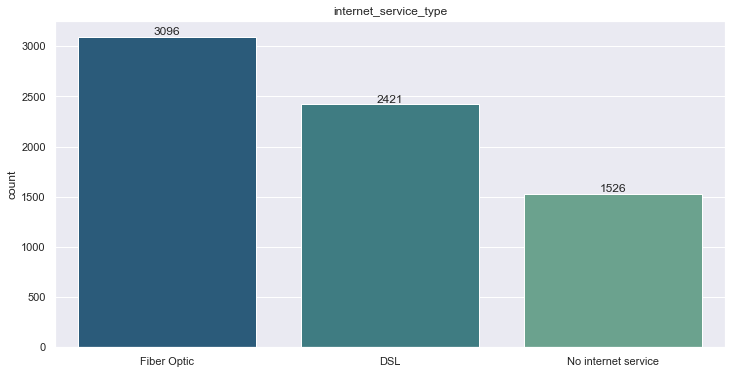

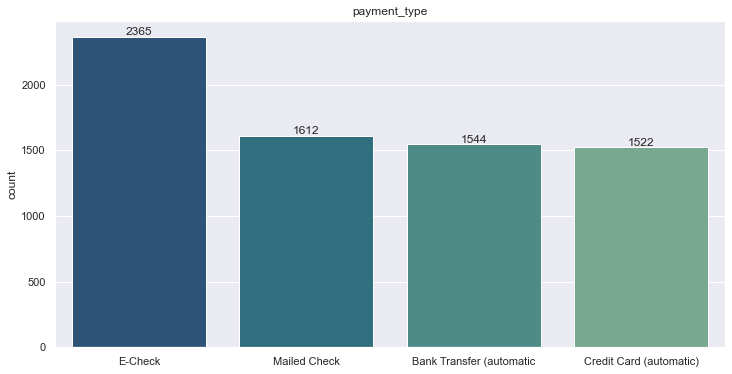

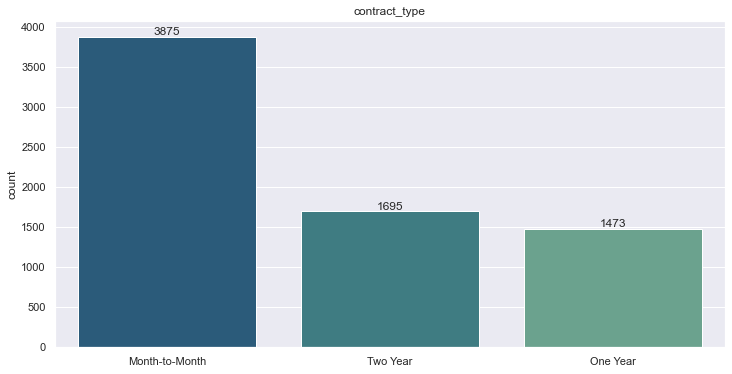

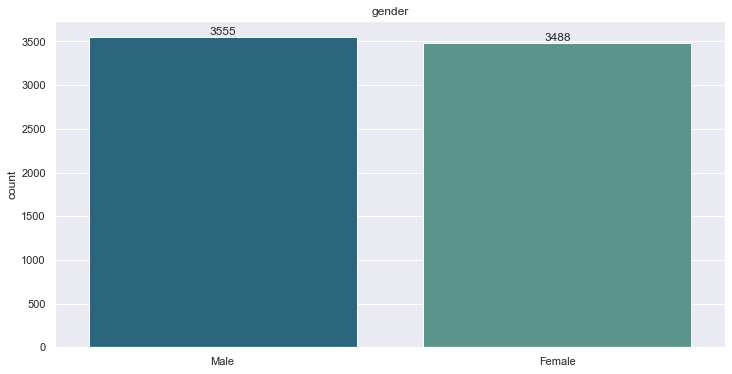

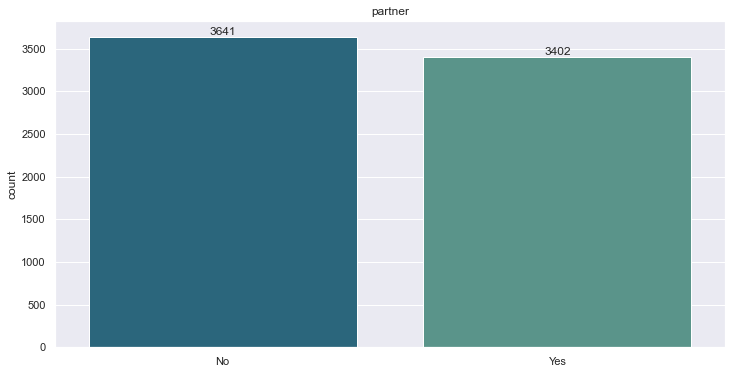

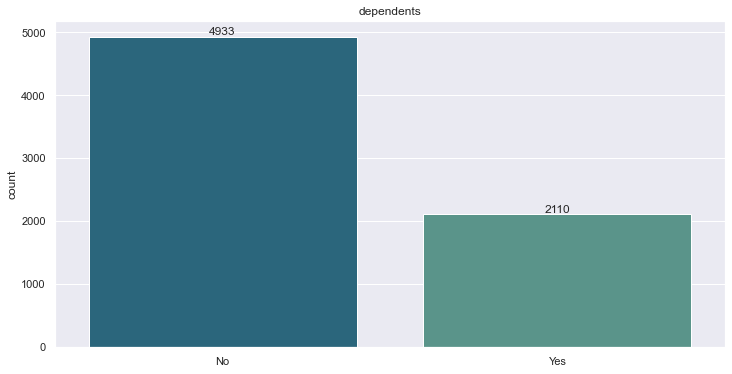

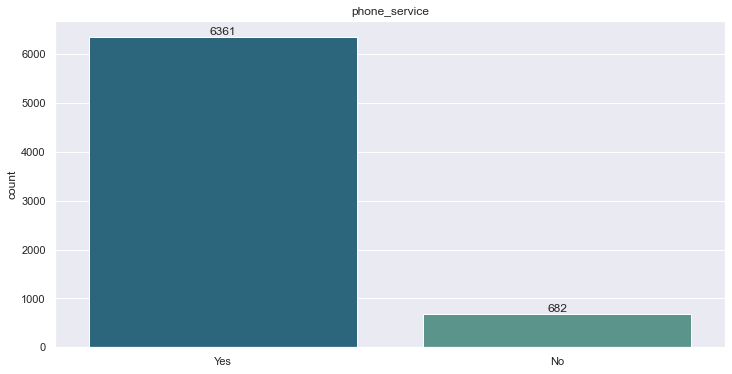

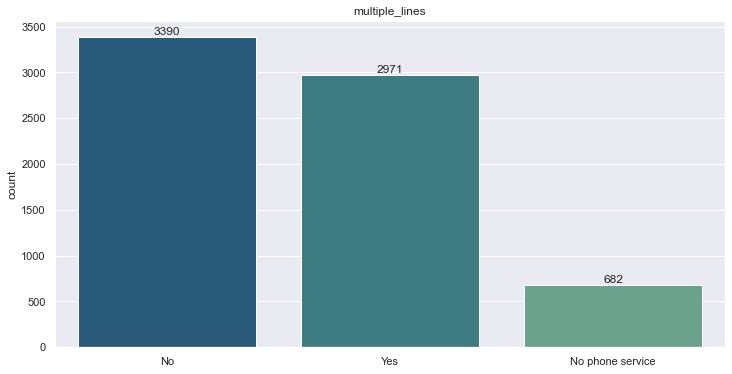

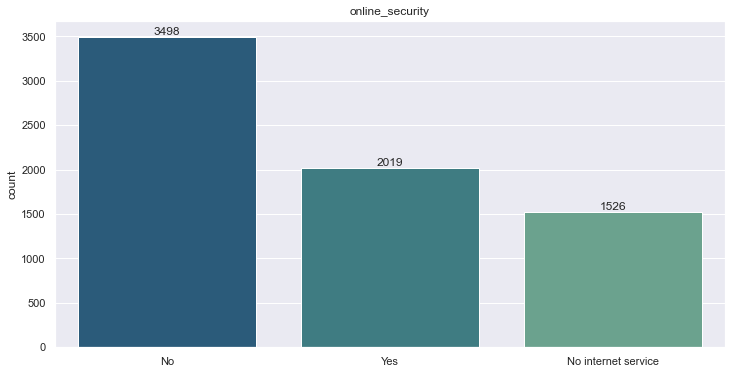

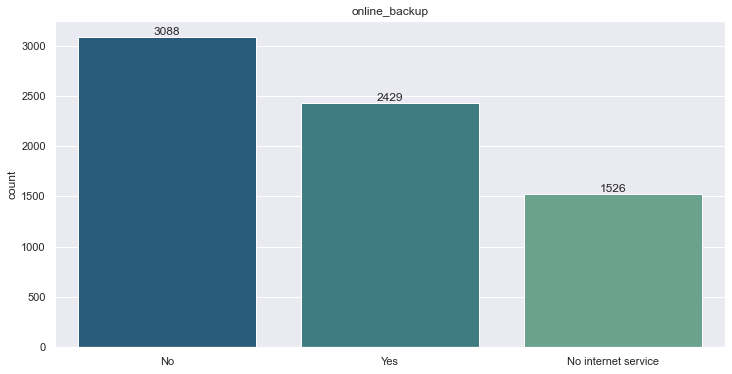

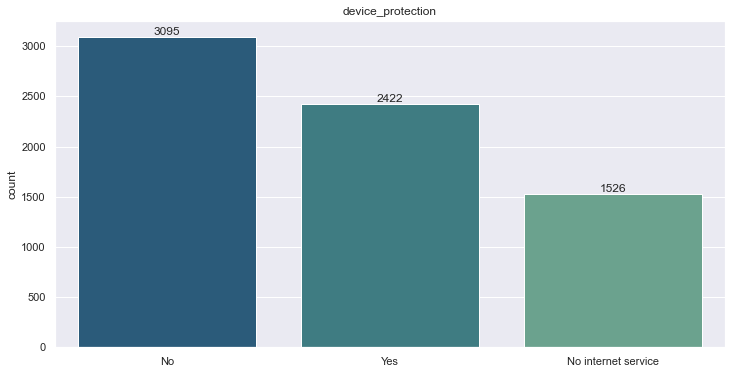

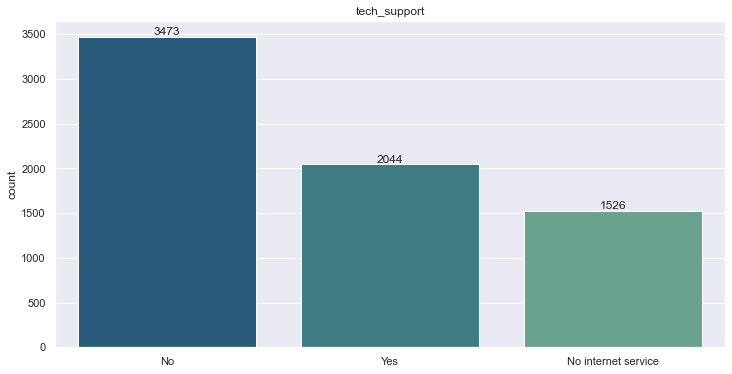

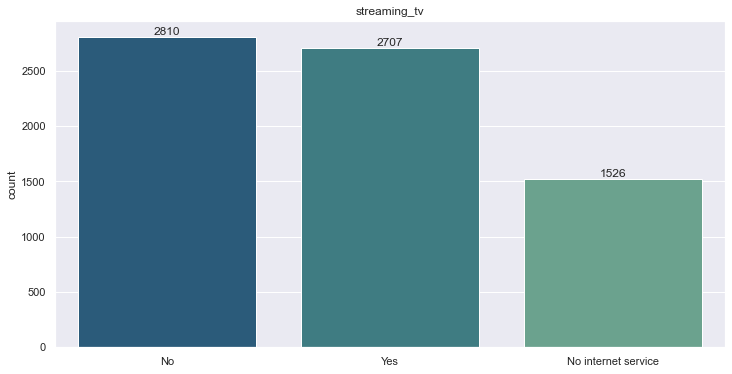

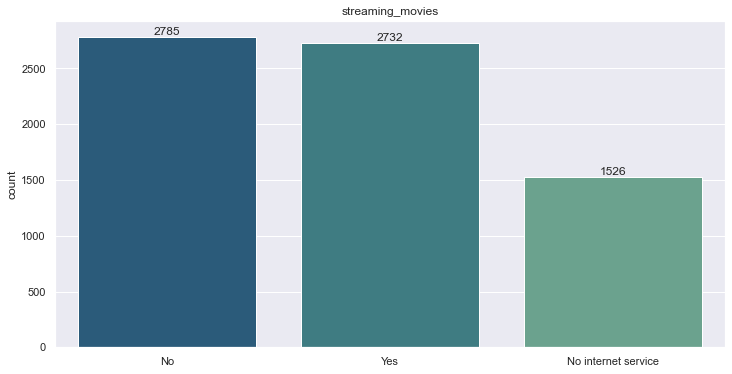

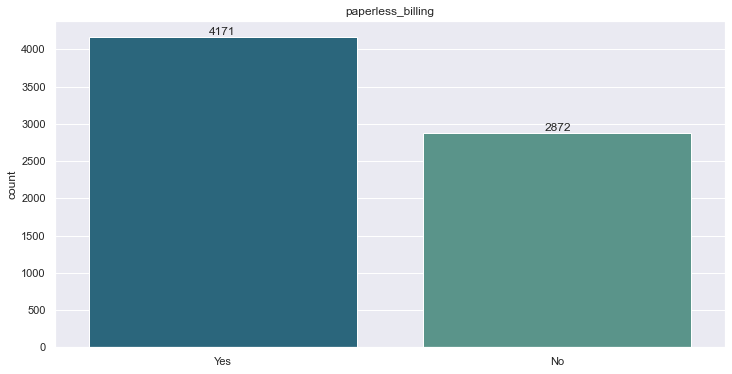

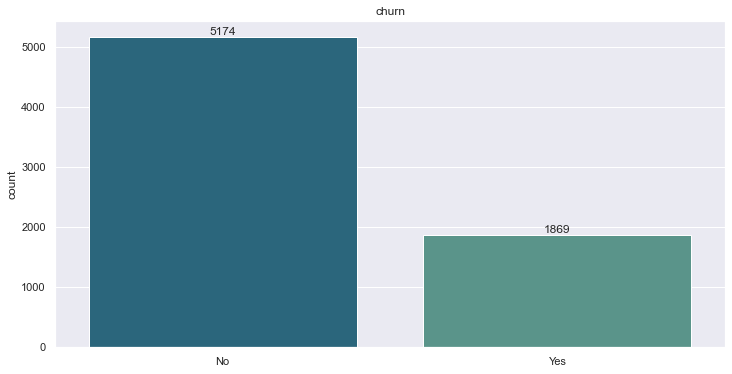

In [1203]:
for column in telco_df[cat_lst]:
    if telco_df[column].dtype != "int" or telco_df[column].dtype != "float":
        plt.figure(figsize=(12, 6))
        sns.set(font_scale = 1)
        ax = sns.countplot(x = column, 
                        data = telco_df,
                        palette = "crest_r",
                        order = telco_df[column].value_counts().index)
        ax.bar_label(ax.containers[0])
        ax.set(xlabel=None)
        plt.title(column)
        plt.show()

In [1204]:
telco_df["churn"] = telco_df["churn"].replace({"No": 0, "Yes": 1}).astype("bool")

In [1205]:
churn_rate = round(telco_df["churn"].mean(), 3)
churn_rate

0.265

Text(0.5, 0, 'Churned')

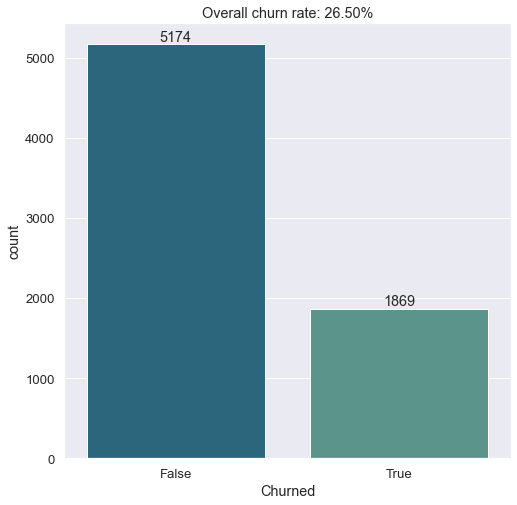

In [1206]:
# plotting the total churn vs. non-churn customers

plt.figure(figsize=(8, 8))
sns.set(font_scale = 1.2)
ax = sns.countplot(x = "churn", 
    data = telco_df,
    order = telco_df["churn"].value_counts().index,
    palette = "crest_r")

ax.bar_label(ax.containers[0])

plt.xticks(rotation = 0)
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel("Churned")

----
### Univariable Plotting of Conteneous/numerical Columns by Frequency


In [1207]:
telco_df.dtypes

internet_service_type                   object
payment_type                            object
contract_type                           object
customer_id                             object
gender                                  object
                                         ...  
streaming_movies_no                       bool
streaming_movies_no_internet_service      bool
streaming_movies_yes                      bool
paperless_billing_no                      bool
paperless_billing_yes                     bool
Length: 62, dtype: object

In [1208]:
telco_df.isnull().sum()

internet_service_type                   0
payment_type                            0
contract_type                           0
customer_id                             0
gender                                  0
                                       ..
streaming_movies_no                     0
streaming_movies_no_internet_service    0
streaming_movies_yes                    0
paperless_billing_no                    0
paperless_billing_yes                   0
Length: 62, dtype: int64

In [1209]:
# 3 total numerical columns 

telco_df.select_dtypes(include = "number").columns

Index(['tenure', 'monthly_charges', 'total_charges'], dtype='object')

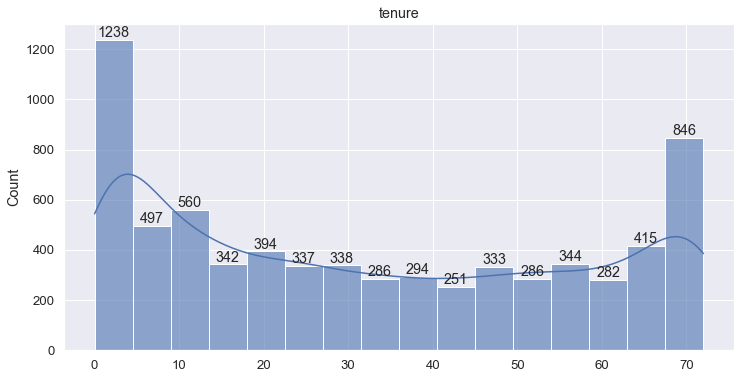

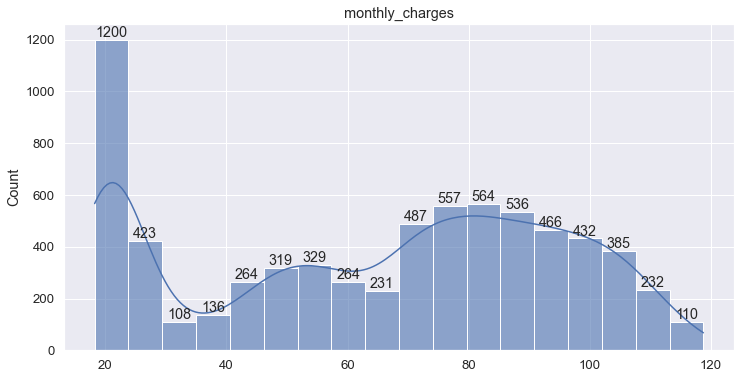

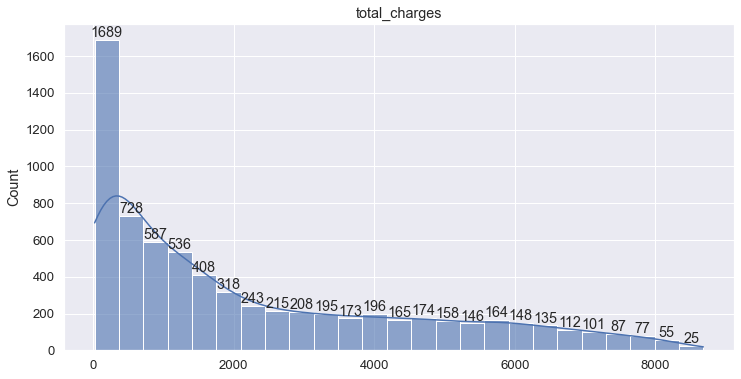

In [1210]:
for column in telco_df.columns:
    if telco_df[column].dtype == "int" or telco_df[column].dtype == "float":
        plt.figure(figsize=(12, 6))
        ax = sns.histplot(x = column, 
                        data = telco_df,
                        kde = True,
                        alpha = 0.6)
        ax.set(xlabel = None)
        ax.bar_label(ax.containers[0])
        plt.title(column)
        plt.show()

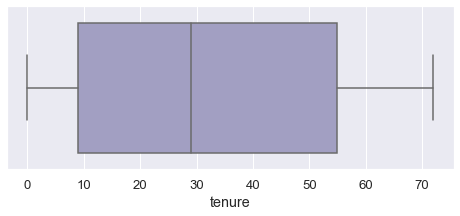

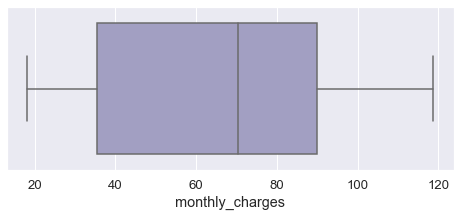

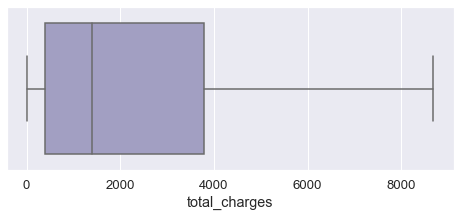

In [1211]:
for column in telco_df.columns:
    if telco_df[column].dtype == "int" or telco_df[column].dtype == "float":
        plt.figure(figsize=(8, 3))
        sns.set(font_scale = 1.2)
        ax = sns.boxplot(x = telco_df[column], palette = "Purples")
        
        plt.show()

-----
#### Splitting the Telco Dataset in Train, Validate, and Test

In [1212]:
# defined acquire.py file function to help with cleaning the Telco Dataset

from acquire import train_validate_test_split 

In [1213]:
train, validate, test = train_validate_test_split(telco_df)

In [1214]:
print(f"Train dataset shape: {train.shape}")
print(f"Validate dataset shape: {validate.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (3943, 62)
Validate dataset shape: (1691, 62)
Test dataset shape: (1409, 62)


----
## Exploration Phase

**<u>Key Questions:</u>**

y = decision to churn

X = independent variable

1. Do the current “Internet Options” have an effect on customers’ decision to churn?
    - Comparing Categorical to Categorical (Chi Squared Test) 
<br><br>
2. Did a customer’s “Tech Support” experience have an impact on their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
3. Did a customer’s “Payment Type” have an effect on customers’ decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
4. Does a customer’s ability to “Stream Movies” impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>

**(Bonus)**

5. Does a customer’s ability to “Stream TV” impact their decision to churn?
    
    - Comparing Categorical to Categorical (Chi Squared Test)
<br><br>
6. Does a customer’s “Total Charges” impact their decision to churn?
    
    - Comparing Continuous Value to Categorical (T-test)

In [1215]:
# importing necessary modules:

import scipy.stats as stats

**<u>Notes on ChiSquared Testing</u>**

**Assumptions**
* When testing the data, the cells should be frequencies or counts of cases and not percentages. It is okay to convert to percentages after testing the data
* The levels (categories) of the variables being tested are mutually exclusive
* Each participant contributes to only one cell within the Chi-square table
* The groups being tested must be independent
* The value of expected cells should be greater than 5

----

## Question #1: Do the current internet options have an effect on customers' decision to churn?

<u>**Hypothesis Formulation:**</u>

$H_0$: "There is NO association/relationship between internet options and their decision to churn."

$H_a$: "There IS an association/relationship between internet options and their decision to churn."

$\alpha$: 0.05

----

In [1216]:
alpha = 0.05

In [1217]:
# cleaning the data -- setting up my variables:

In [1218]:
train["internet_service_type"].unique()

array(['No internet service', 'Fiber Optic', 'DSL'], dtype=object)

In [1219]:
# Fiber Optic            1740
# DSL                    1365
# No internet service     838

train["internet_service_type"].value_counts()

Fiber Optic            1740
DSL                    1365
No internet service     838
Name: internet_service_type, dtype: int64

In [1220]:
# creating new dataframe

internet_df = train

In [1221]:
internet_df.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_no_internet_service,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes
5657,No internet service,Mailed Check,Month-to-Month,1051-EQPZR,Female,False,Yes,Yes,44,Yes,...,True,False,False,True,False,False,True,False,True,False
3796,Fiber Optic,Credit Card (automatic),Month-to-Month,4450-DLLMH,Male,False,No,No,2,Yes,...,False,False,True,False,False,True,False,False,False,True
4566,Fiber Optic,Credit Card (automatic),Month-to-Month,6833-JMZYP,Female,False,No,No,15,Yes,...,False,False,False,False,True,False,False,True,False,True
2389,DSL,Mailed Check,One Year,9830-ECLEN,Male,False,Yes,Yes,58,No,...,False,False,False,False,True,True,False,False,True,False
2793,Fiber Optic,E-Check,Month-to-Month,1200-TUZHR,Female,True,No,No,8,Yes,...,False,False,True,False,False,False,False,True,True,False


In [1222]:
internet_df.shape # checking the returned number of values/observations 

(3943, 62)

In [1223]:
# creating my "observed" values

observed = pd.crosstab(index = internet_df["internet_service_type"], columns = internet_df["churn"], margins = True)
observed

churn,False,True,All
internet_service_type,,,
DSL,1106,259,1365
Fiber Optic,1016,724,1740
No internet service,775,63,838
All,2897,1046,3943


In [1224]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [1225]:
print("\n","Observed Values:", "\n", observed.values)
print("-----","\n","Expected Values:", "\n", exp_values.astype(int))

print("-----","\n","chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[1106  259 1365]
 [1016  724 1740]
 [ 775   63  838]
 [2897 1046 3943]]
----- 
 Expected Values: 
 [[1002  362 1365]
 [1278  461 1740]
 [ 615  222  838]
 [2897 1046 3943]]
----- 
 chi2 =  398.38
p_value = 0.0
Degrees of Freedom = 6


In [1226]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between internet options (DSL or Fiber Optic) and their decision to churn.
   
   *Internet Options:*

       - DSL
       - Fiber Optic
       - No internet service
  
<br><br>
2. We will therefore carry these features forward into future predictive modeling.

----

## Question #2: Does opting for “Tech Support” service have an impact on their decision to churn?


<u>**Hypothesis Formulation (tech support option):**</u>

$H_0$: "There is NO association/relationship between the tech support option and a customer's decision to churn."

$H_a$: "There IS an association/relationship between the tech support option and a customer's decision to churn."


$\alpha$: 0.05

----

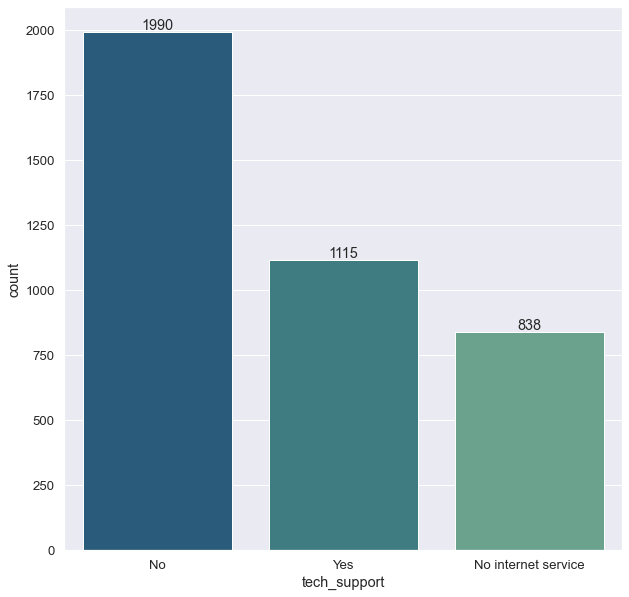

In [1227]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x = "tech_support", 
    data = train,
    order = train["tech_support"].value_counts().index,
    palette = "crest_r")

ax.bar_label(ax.containers[0])
plt.show()

In [1228]:
alpha = 0.05

In [1229]:
train["tech_support"].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [1230]:
# creating new dataframe

tech_support = train

In [1231]:
tech_support.shape

(3943, 62)

In [1232]:
# tech_support dataframe summary statistics

summary_stats = tech_support.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8


In [1233]:
# summary statistics with "range" column

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6,100.2
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8,8666.0


In [1234]:
# creating an observation table of the dataframe

observed = pd.crosstab(index = tech_support["tech_support"], columns = tech_support["churn"], margins = True)
observed

churn,False,True,All
tech_support,,,
No,1173,817,1990
No internet service,775,63,838
Yes,949,166,1115
All,2897,1046,3943


In [1235]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [1236]:
print("\n","Observed Values:", "\n", observed.values)
print("-----","\n","Expected Values:", "\n", exp_values.astype(int))

print("-----","\n","chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[1173  817 1990]
 [ 775   63  838]
 [ 949  166 1115]
 [2897 1046 3943]]
----- 
 Expected Values: 
 [[1462  527 1990]
 [ 615  222  838]
 [ 819  295 1115]
 [2897 1046 3943]]
----- 
 chi2 =  448.36
p_value = 0.0
Degrees of Freedom = 6


In [1237]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between the "tech support" service option and a customer's decision to churn.
   
   *Tech Support Options (w/internet services):*
   
        - Yes (has tech support)
        - No (doesn't have tech support)
        - No internet service 

2. We will therefore carry this feature forward into future predictive modeling.

----

## Question #3: Do current “Payment Type” options have an effect on their decision to churn?

<u>**Hypothesis Formulation (payment types):**</u>

$H_0$: "There is NO association/relationship between monthly bill payment options and their decision to churn."

$H_a$: "There IS an association/relationship between monthly bill payment options and their decision to churn."


$\alpha$: 0.05

----

In [1238]:
alpha = 0.05

In [1239]:
train["payment_type"].unique()

array(['Mailed Check', 'Credit Card (automatic)', 'E-Check',
       'Bank Transfer (automatic'], dtype=object)

In [1240]:
# creating a new dataframe

payment_options = train

In [1241]:
# since I am measuring the potential impact of all payment options on churn, i will not need to create a new dataframe
# generating summary statistics 

summary_stats = payment_options.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8


In [1242]:
# creating a "range" column for this dataset

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6,100.2
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8,8666.0


Text(0.5, 1.0, 'payment_type')

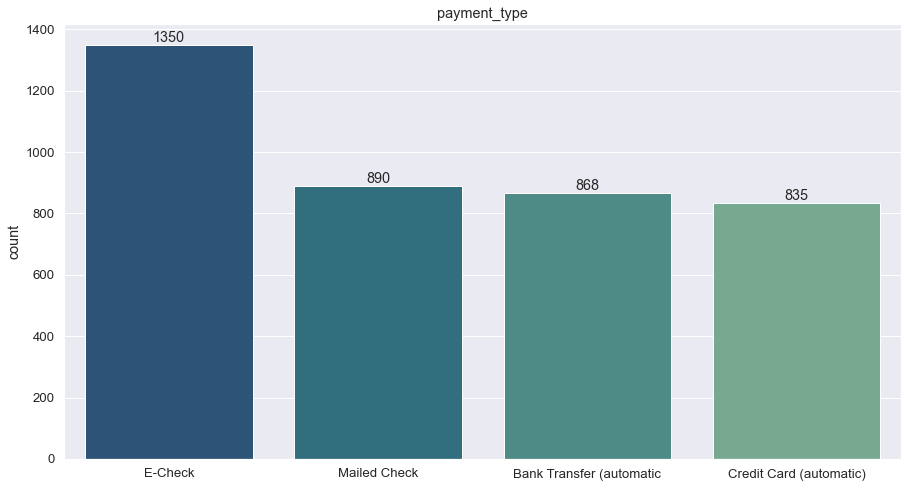

In [1243]:
# plotting values by frequency (count)

plt.figure(figsize=(15, 8))
ax = sns.countplot(x = "payment_type", 
    data = payment_options,
    order = train["payment_type"].value_counts().index,
    palette = "crest_r")
    
ax.set(xlabel = None)
ax.bar_label(ax.containers[0])
plt.title("payment_type")

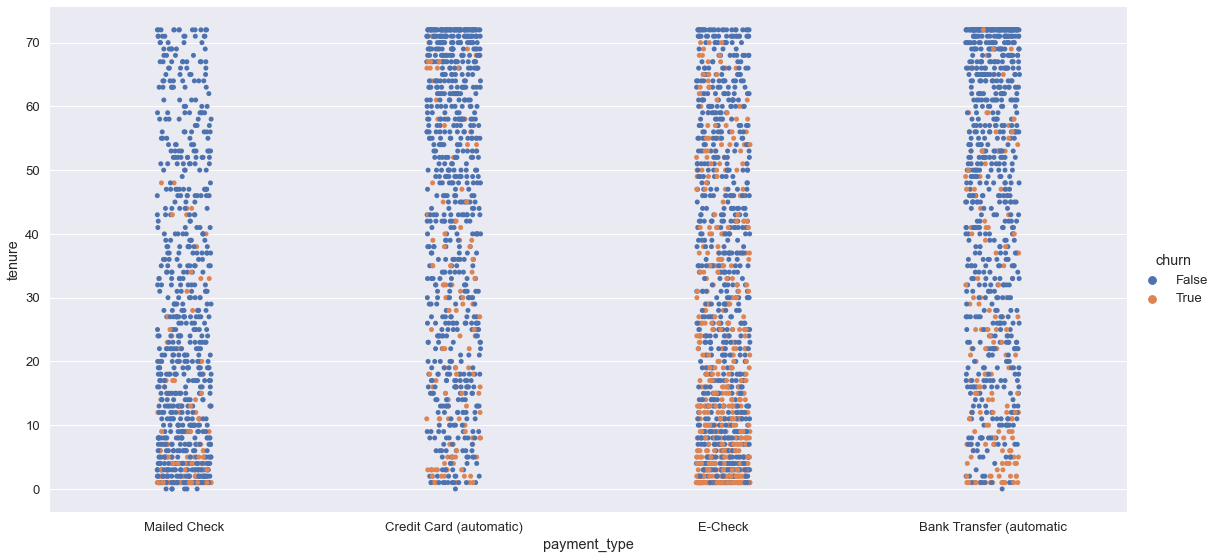

In [1244]:
# scatter/sns.catplot for payment option by tenure and churn

sns.catplot(x = "payment_type", y = "tenure", data = payment_options, hue = "churn", height = 8, aspect = 2)

In [1245]:
# creating an observation table of the dataframe

observed = pd.crosstab(index = payment_options["payment_type"], columns = payment_options["churn"], margins = True)
observed

churn,False,True,All
payment_type,,,
Bank Transfer (automatic,714,154,868
Credit Card (automatic),714,121,835
E-Check,739,611,1350
Mailed Check,730,160,890
All,2897,1046,3943


In [1246]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [1247]:
print("\n","Observed Values:", "\n", observed.values)
print("-----","\n","Expected Values:", "\n", exp_values.astype(int))

print("-----","\n","chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[ 714  154  868]
 [ 714  121  835]
 [ 739  611 1350]
 [ 730  160  890]
 [2897 1046 3943]]
----- 
 Expected Values: 
 [[ 637  230  868]
 [ 613  221  835]
 [ 991  358 1350]
 [ 653  236  890]
 [2897 1046 3943]]
----- 
 chi2 =  372.85
p_value = 0.0
Degrees of Freedom = 8


In [1248]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between the current "payment type" options and a customer's decision to churn.
   
   *Payment Type Options:*
   
        - E-Check (electronic Check)

        - Bank Transfer (automatic payment option)

        - Credit Card (automatic payment option)

        - Mailed Check 

2. We will therefore carry this feature forward into future predictive modeling.

----

## 4. Does whether or not a customer “Streams Movies” impact their decision to churn?

<u>**Hypothesis Formulation (movie streaming):**</u>

$H_0$: "There is NO association/relationship between streaming movies and customers' decision to churn."

$H_a$: "There IS an association/relationship between streaming movies and customers' decision to churn."


$\alpha$: 0.05

----

In [1249]:
alpha = 0.05

In [1250]:
# creating new dataframe

stream_movies = train

In [1251]:
# viewing feature options/values

stream_movies["streaming_movies"].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [1252]:
stream_movies.shape

(3943, 62)

In [1253]:
# generating summary statistics 

summary_stats = stream_movies.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8


In [1254]:
# creating a "range" column for this dataset

summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
tenure,3943.0,32.531829,24.542655,0.0,9.000,29.00,56.000,72.0,72.0
monthly_charges,3943.0,65.119883,30.023920,18.4,38.175,70.60,90.050,118.6,100.2
total_charges,3943.0,2313.859067,2284.689172,18.8,402.725,1415.55,3840.675,8684.8,8666.0


Text(0.5, 1.0, 'Streaming Movies')

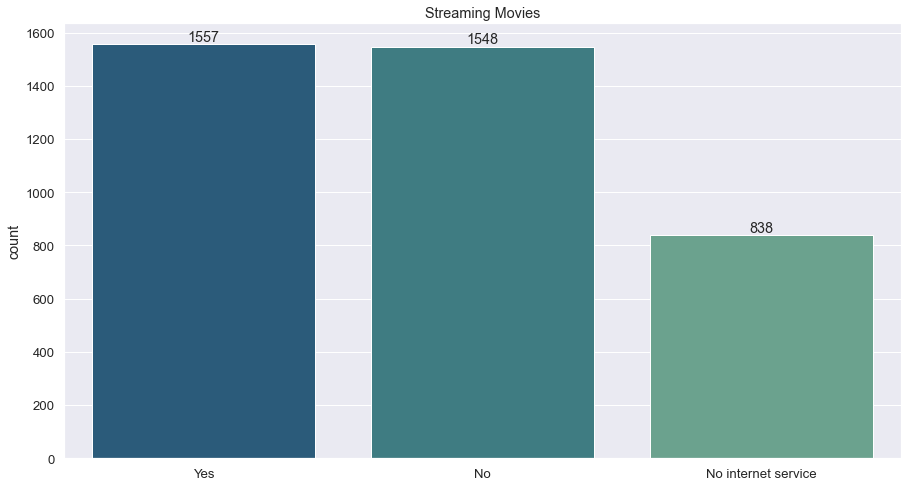

In [1255]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x = "streaming_movies", 
    data = stream_movies,
    order = stream_movies["streaming_movies"].value_counts().index,
    palette = "crest_r")
 
ax.set(xlabel = None)
ax.bar_label(ax.containers[0])
plt.title("Streaming Movies")


# relatively similar numbers across customers who stream movies and those who dont 

In [1256]:
# creating an observation table of the dataframe

observed = pd.crosstab(index = stream_movies["streaming_movies"], columns = stream_movies["churn"], margins = True)
observed

churn,False,True,All
streaming_movies,,,
No,1023,525,1548
No internet service,775,63,838
Yes,1099,458,1557
All,2897,1046,3943


In [1257]:
# running the ChiSquared Test

chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [1258]:
print("\n","Observed Values:", "\n", observed.values)
print("-----","\n","Expected Values:", "\n", exp_values.astype(int))

print("-----","\n","chi2 = ", chi.round(2))
print("p_value =", p_value.round(5))
print("Degrees of Freedom =", degf)


 Observed Values: 
 [[1023  525 1548]
 [ 775   63  838]
 [1099  458 1557]
 [2897 1046 3943]]
----- 
 Expected Values: 
 [[1137  410 1548]
 [ 615  222  838]
 [1143  413 1557]
 [2897 1046 3943]]
----- 
 chi2 =  205.37
p_value = 0.0
Degrees of Freedom = 6


In [1259]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis.


**Conclusion:**

1. Given the relatively low p-value in our ChiSquared Test - we can conclude with a 95% confidence interval in this dataset that there is an association/relationship between the option to "Stream Movies" and a customer's decision to churn.
   
   *Streaming Movies Options:*
   
        - "Yes" (has internet and streams movies)
        - "No" (has internet but doesn't stream movies)
        - "No internet service" (can't stream movies)

2. We will therefore carry this feature forward into future predictive modeling.


-----
## Modeling Phase

In [1260]:
# importing needed modules/functions for modeling phase

# modeling functions
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# data splitting
from sklearn.model_selection import train_test_split

# reporting
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# removing return/print warnings
import warnings
warnings.filterwarnings("ignore")

----
### Generating a baseline prediction

**<u>Notes:</u>**

- We are predicting customer "churn"

**Survival:**

False/0 = does not churn

True/1 = churned 

- True Positive: predict churn --> (actual) churned

- True Negative: predict did NOT churn --> (actual) did not churn

- False Positive: predict churn --> (actual) did not churn

- False Negative: predict did NOT churn --> (actual) churned 

----

In [1261]:
# let's create a copy of our train dataset

train_copy = train

In [1262]:
train_copy.shape

(3943, 62)

In [1263]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5657 to 6863
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   internet_service_type                      3943 non-null   object 
 1   payment_type                               3943 non-null   object 
 2   contract_type                              3943 non-null   object 
 3   customer_id                                3943 non-null   object 
 4   gender                                     3943 non-null   object 
 5   senior_citizen                             3943 non-null   bool   
 6   partner                                    3943 non-null   object 
 7   dependents                                 3943 non-null   object 
 8   tenure                                     3943 non-null   int64  
 9   phone_service                              3943 non-null   object 
 10  multiple_lines       

In [1264]:
# number of columns/features by type

train_copy.dtypes.value_counts()

bool       43
object     16
float64     2
int64       1
dtype: int64

In [1265]:
# note: the model will also read boolean type (F/T) as either (0/1)

# False (did not churn):    2897 customers
# True (did churn):     1046 customers

train_copy.churn.value_counts()

False    2897
True     1046
Name: churn, dtype: int64

In [1266]:
# baseline prediction = highest frequency outcome "does not churn" or False/0

train_copy["baseline_prediction"] = False
train_copy.head()

,internet_service_type,payment_type,contract_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support_yes,streaming_tv_no,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no,streaming_movies_no_internet_service,streaming_movies_yes,paperless_billing_no,paperless_billing_yes,baseline_prediction
5657,No internet service,Mailed Check,Month-to-Month,1051-EQPZR,Female,False,Yes,Yes,44,Yes,...,False,False,True,False,False,True,False,True,False,False
3796,Fiber Optic,Credit Card (automatic),Month-to-Month,4450-DLLMH,Male,False,No,No,2,Yes,...,False,True,False,False,True,False,False,False,True,False
4566,Fiber Optic,Credit Card (automatic),Month-to-Month,6833-JMZYP,Female,False,No,No,15,Yes,...,False,False,False,True,False,False,True,False,True,False
2389,DSL,Mailed Check,One Year,9830-ECLEN,Male,False,Yes,Yes,58,No,...,False,False,False,True,True,False,False,True,False,False
2793,Fiber Optic,E-Check,Month-to-Month,1200-TUZHR,Female,True,No,No,8,Yes,...,False,True,False,False,False,False,True,True,False,False


In [1267]:
train_copy[["churn", "baseline_prediction"]].dtypes

churn                  bool
baseline_prediction    bool
dtype: object

In [1268]:
# baseline accuracy score: the total number of times that the baseline prediction matched the actual churn outcome
# baseline accuracy score: ~74.0% **(note that if the goal is to predict churn = 1, then baseline accuracy is ~26%)

baseline_acc = (train_copy["baseline_prediction"] == train_copy["churn"]).mean().round(3)
print(f"Baseline Accuracy: % {(baseline_acc * 100).round()}")

Baseline Accuracy: % 74.0


----

### <u>Prediction(s):</u>

Given the **<u>hypothesis testing in exploration</u>**, i conclude that:

* internet service
* payment type
* streaming movies and...
* tech support

are a better predictors of customer churn than the baseline.

In [1269]:
with pd.option_context('display.max_rows', None):
    df = train_copy.reindex(sorted(train_copy.columns), axis =1)
    print(pd.Series(df.columns))

0                           baseline_prediction
1                                         churn
2                                 contract_type
3                  contract_type_month_to_month
4                        contract_type_one_year
5                        contract_type_two_year
6                                   customer_id
7                                    dependents
8                                 dependents_no
9                                dependents_yes
10                            device_protection
11                         device_protection_no
12        device_protection_no_internet_service
13                        device_protection_yes
14                                       gender
15                                gender_female
16                                  gender_male
17                        internet_service_type
18                    internet_service_type_dsl
19            internet_service_type_fiber_optic
20    internet_service_type_no_internet_

In [1270]:
# 2nd split of the train dataset ---
# selecting the needed data features necessary for modeling

X = train_copy[[ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service', \
    'payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no',
    'tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']]

y = train_copy["churn"]

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

----
### Decision Tree: Model 01

In [1271]:
# analyzing the data

X_train.head()

,internet_service_type_fiber_optic,internet_service_type_dsl,internet_service_type_no_internet_service,payment_type_credit_card_automatic,payment_type_e_check,payment_type_mailed_check,payment_type_bank_transfer_automatic,streaming_movies_no_internet_service,streaming_movies_yes,streaming_movies_no,tech_support_no_internet_service,tech_support_yes,tech_support_no
2620,True,False,False,False,False,True,False,False,False,True,False,False,True
6822,False,False,True,False,False,True,False,True,False,False,True,False,False
3472,True,False,False,True,False,False,False,False,True,False,False,True,False
675,False,True,False,False,False,False,True,False,False,True,False,False,True
3308,True,False,False,True,False,False,False,False,True,False,False,False,True


In [1272]:
X_train.shape

(2208, 13)

In [1273]:
# samples of churn

y_train.head()

2620    False
6822    False
3472     True
675      True
3308    False
Name: churn, dtype: bool

In [1274]:
# churn by the numbers:

y_train.value_counts()

False    1620
True      588
Name: churn, dtype: int64

In [1275]:
# creating the first decision tree

tree1 = DecisionTreeClassifier(max_depth = 3, random_state = 3)

In [1276]:
# fitting the decision tree with "in-sample" train data

tree1 = tree1.fit(X_train, y_train)

In [1277]:
# generating the model predictions:

y_predictions = tree1.predict(X_train)

In [1278]:
# viewing predictions sample:

y_predictions[0:51]

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False])

In [1279]:
# generating my own confusion matrix

pd.crosstab(index = y_predictions, columns = y_train, margins = True)

churn,False,True,All
row_0,,,
False,1460,341,1801
True,160,247,407
All,1620,588,2208


In [1280]:
# understanding the confusion matrix further:

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 1460
False Positive: 160
False Negative: 341
True Positive: 247


In [1281]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)

support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy.round(2)}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate.round(2)}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate.round(2)}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate.round(2)}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate.round(2)}", '\n')
print(f"Precision/PPV: {precision.round(2)}", '\n')
print(f"F1 Score: {f1_score.round(2)}", '\n')
print(f"Support (0): {support_neg.round(2)}", '\n')
print(f"Support (1): {support_pos.round(2)}")

Accuracy: 0.77 

True Positive Rate/Sensitivity/Recall/Power: 0.42 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1 

True Negative Rate/Specificity/Selectivity: 0.9 

False Negative Rate/Miss Rate: 0.58 

Precision/PPV: 0.61 

F1 Score: 0.5 

Support (0): 1620 

Support (1): 588


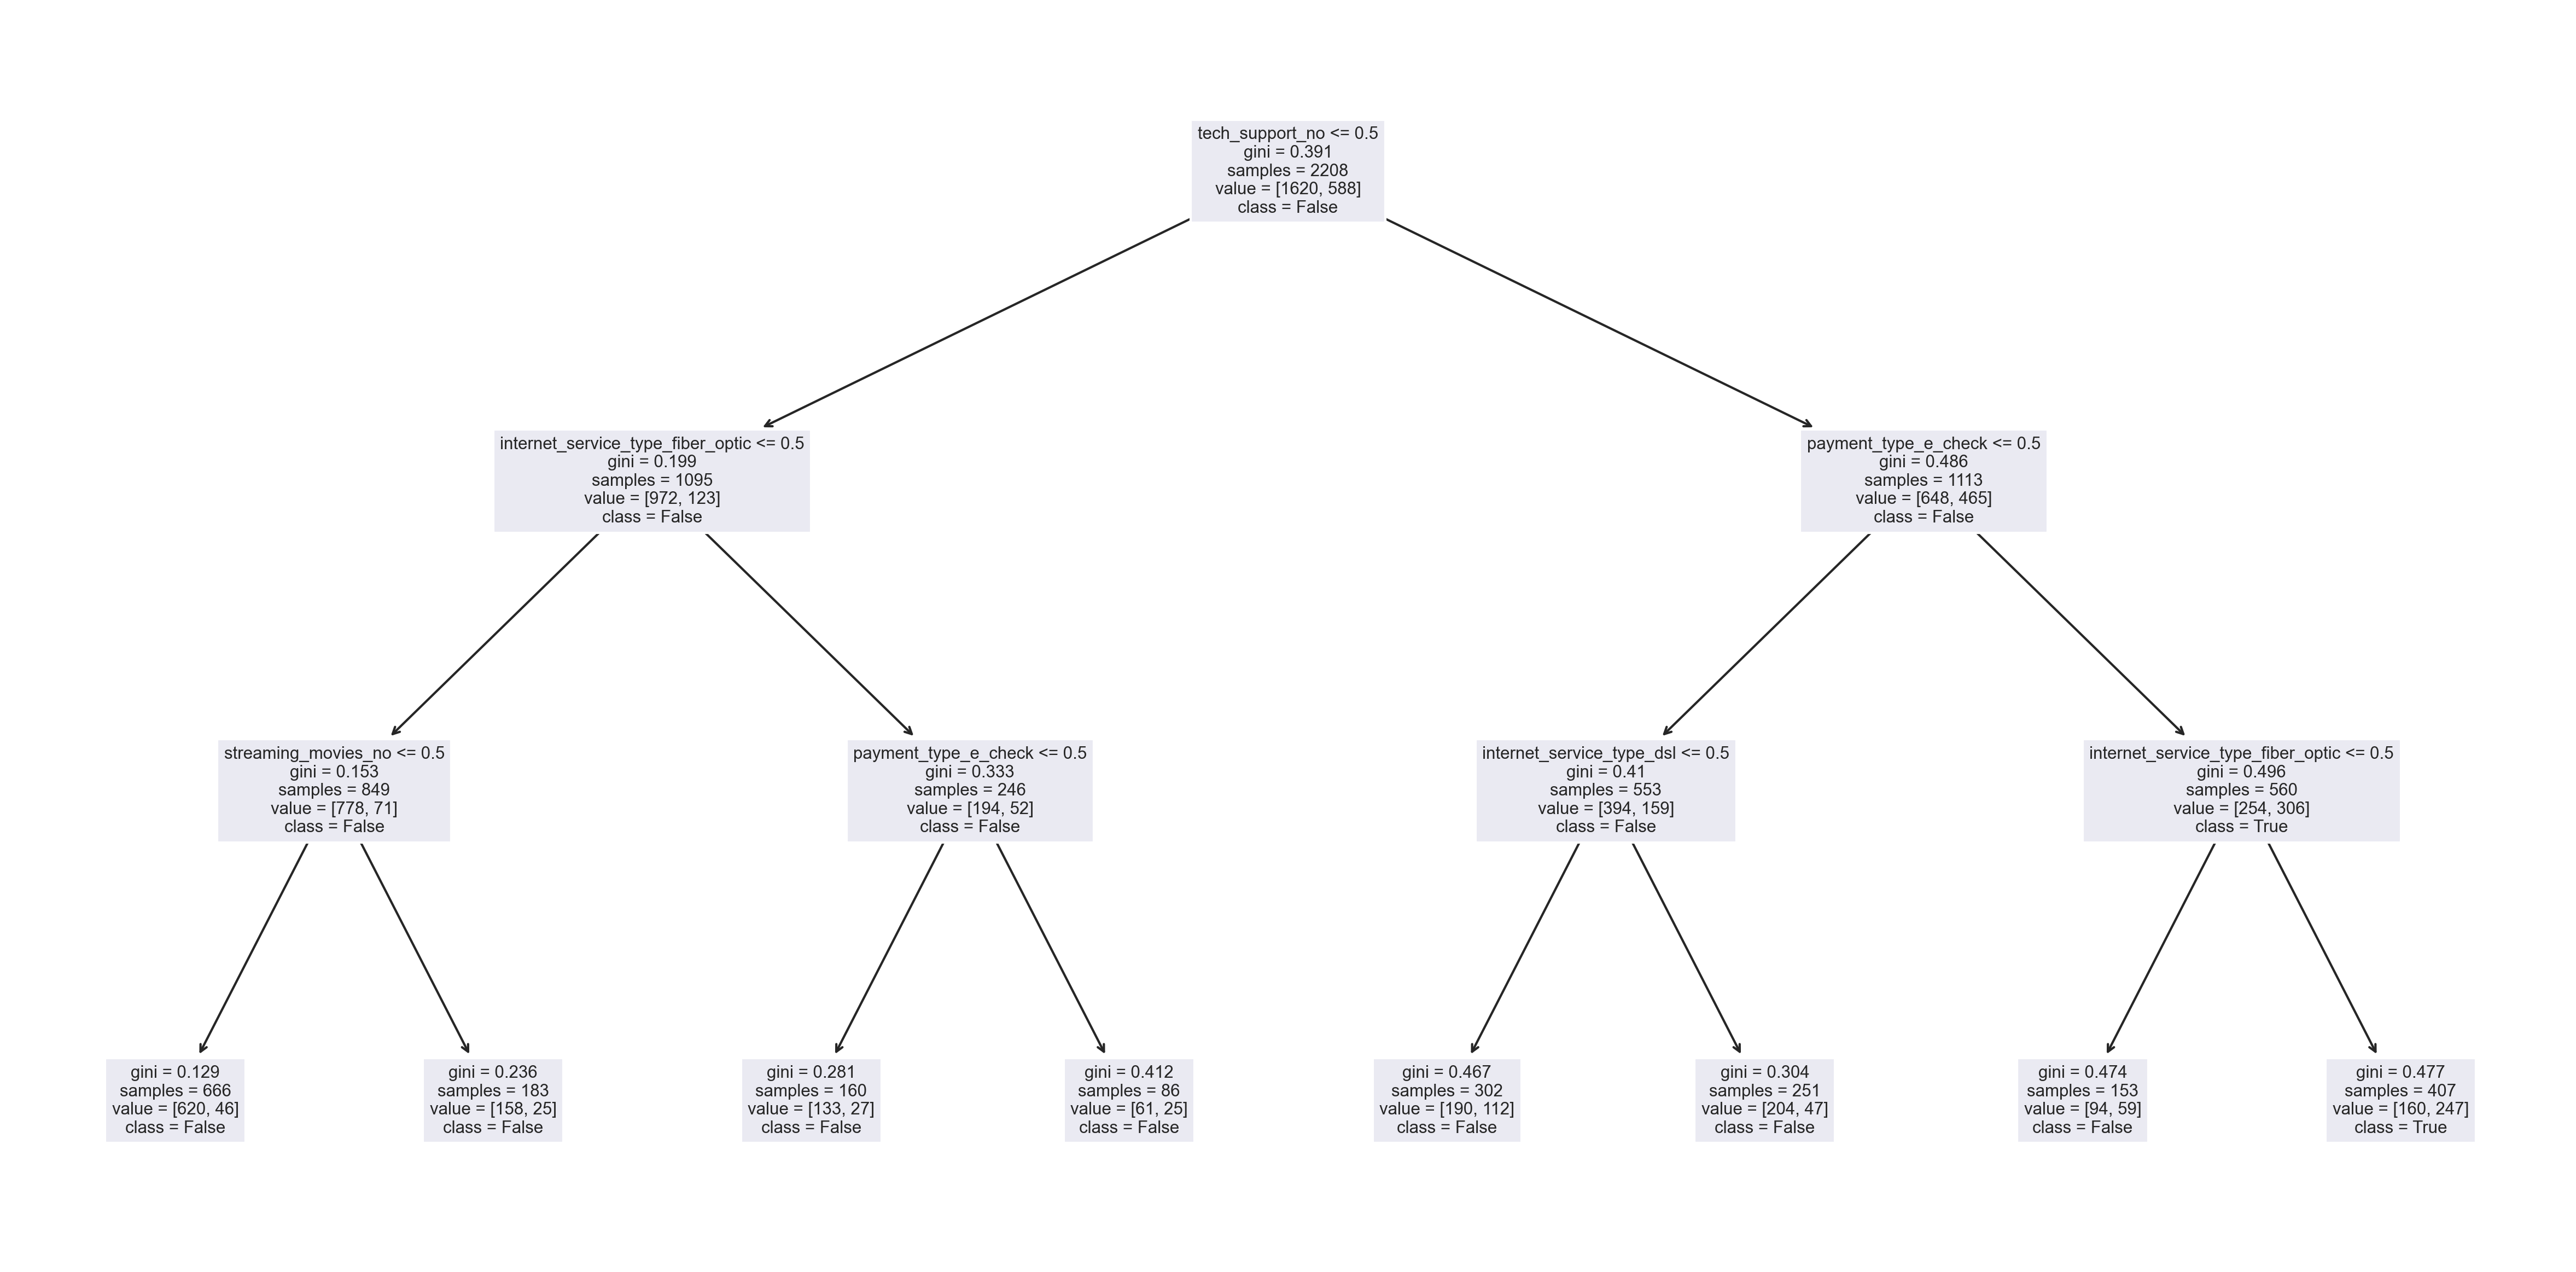

In [1282]:
# plotting the decision tree

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.figure(figsize=(20, 10))
plot_tree(tree1, feature_names = X_train.columns.astype("str"), class_names = y_train.unique().astype("str"))
plt.show()

In [1283]:
# using a for loop method to create classification reports for all decision tree depths from range 1-15

for i in range(1, 16):
    # Making the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fitting the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Using the model
    # We'll evaluate the model's performance on train, first:
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of: {i}")
    print(pd.DataFrame(report))

    print() # printing a indented line for ea. iteration

Tree with max depth of: 1
                 False   True  accuracy    macro avg  weighted avg
precision     0.733696    0.0  0.733696     0.366848      0.538309
recall        1.000000    0.0  0.733696     0.500000      0.733696
f1-score      0.846395    0.0  0.733696     0.423197      0.620996
support    1620.000000  588.0  0.733696  2208.000000   2208.000000

Tree with max depth of: 2
                 False        True  accuracy    macro avg  weighted avg
precision     0.828883    0.546429  0.757246     0.687656      0.753665
recall        0.843210    0.520408  0.757246     0.681809      0.757246
f1-score      0.835985    0.533101  0.757246     0.684543      0.755326
support    1620.000000  588.000000  0.757246  2208.000000   2208.000000

Tree with max depth of: 3
                 False        True  accuracy    macro avg  weighted avg
precision     0.810661    0.606880  0.773098     0.708770      0.756393
recall        0.901235    0.420068  0.773098     0.660651      0.773098
f1-score 

In [1284]:
# evaluating the initial decision tree1 performance where best decision tree depth max for f1-score/accuracy is: 3

decision_tree_acc = tree1.score(X_train, y_train)

print('Accuracy of Decision Tree Classifer on training dataset: {:.2f}'.format(tree1.score(X_train, y_train)))
print(f'Absolute % Difference (Baseline vs. Decision Tree Model): % {round(baseline_acc - decision_tree_acc, 2)*100}')

Accuracy of Decision Tree Classifer on training dataset: 0.77
Absolute % Difference (Baseline vs. Decision Tree Model): % -4.0


----- 

### Random Forest: Model 02

In [1285]:
# resplitting data for integrity

X = train_copy[[ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service', \
    'payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no',
    'tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']]

y = train_copy["churn"]

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [1286]:
# generating the first random forest model

rf1 = RandomForestClassifier(min_samples_leaf = 1, max_depth = 3, random_state = 123)

In [1287]:
type(rf1)

sklearn.ensemble._forest.RandomForestClassifier

In [1288]:
# fitting the initial random forest model with in-sample data:

rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [1289]:
# understanding the importance of ea. feature input in the model

pd.Series(rf1.feature_importances_)

0     0.201903
1     0.075754
2     0.069525
3     0.029331
4     0.145056
5     0.008709
6     0.013424
7     0.045875
8     0.002544
9     0.010538
10    0.059584
11    0.088702
12    0.249055
dtype: float64

<AxesSubplot:>

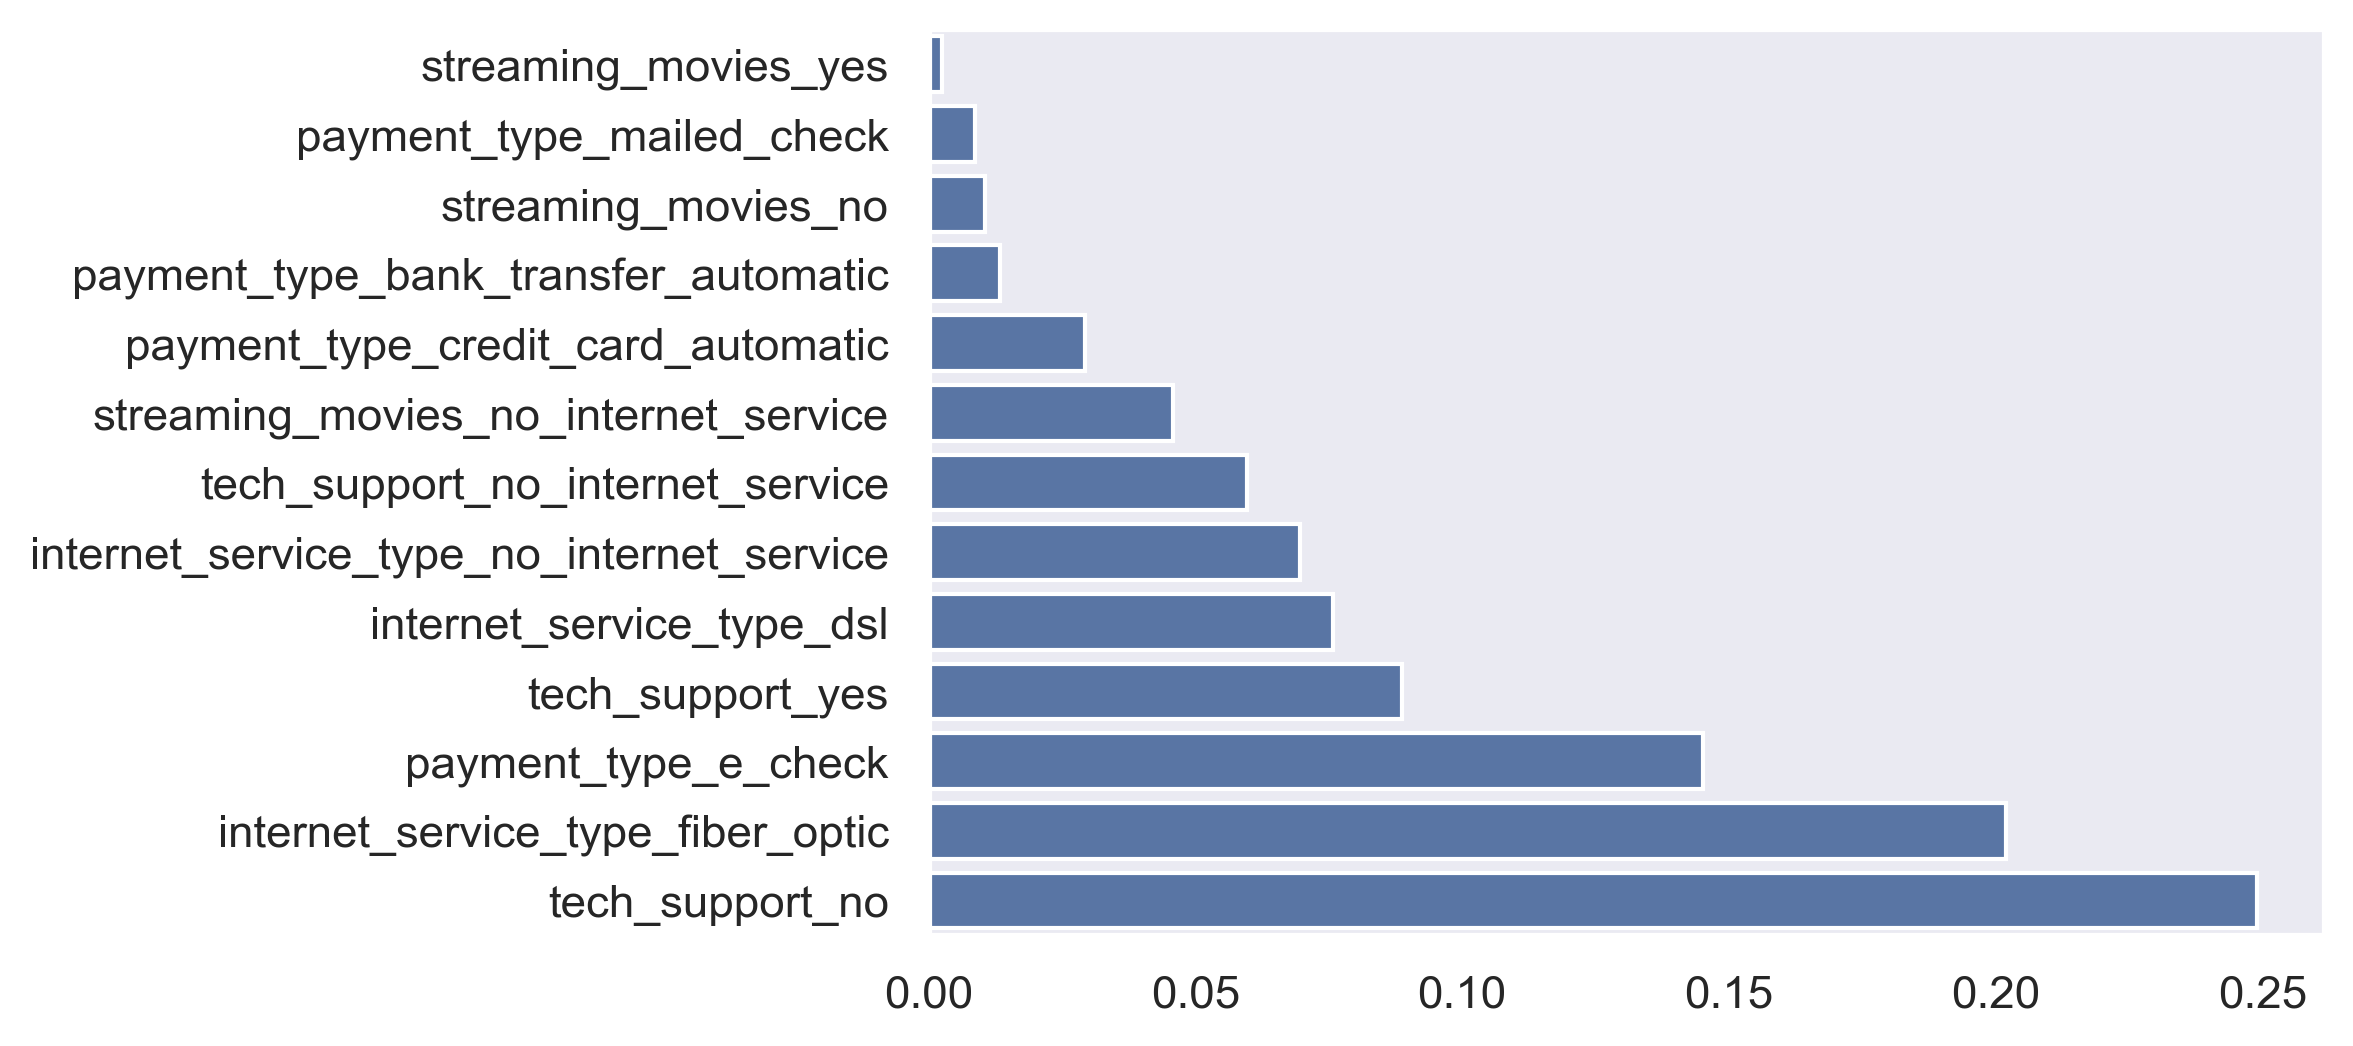

In [1290]:
# by name plot of feature importance

sorted_idx = rf1.feature_importances_.argsort()
sns.set_theme(style = "dark")
sns.barplot(rf1.feature_importances_[sorted_idx], X_train.columns[sorted_idx], orient = "h", color = "b")

In [1291]:
# sample of random forest model predictions:

y_predictions = rf1.predict(X_train)
y_predictions[0:51]

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False])

In [1292]:
# estimating the probability of ea. customer churn outcome (does not churn / churns)
# it's my understanding from these estimates that there is not a lot of "variability" when determining that a customer does churn vs. when they do not

y_prediction_probability = rf1.predict_proba(X_train)
y_prediction_probability[0:51]

array([[0.57619981, 0.42380019],
       [0.92479685, 0.07520315],
       [0.79968389, 0.20031611],
       [0.75874899, 0.24125101],
       [0.62913547, 0.37086453],
       [0.48973024, 0.51026976],
       [0.75874899, 0.24125101],
       [0.92479685, 0.07520315],
       [0.48973024, 0.51026976],
       [0.7178949 , 0.2821051 ],
       [0.88997161, 0.11002839],
       [0.65446388, 0.34553612],
       [0.62913547, 0.37086453],
       [0.47422611, 0.52577389],
       [0.65446388, 0.34553612],
       [0.86960418, 0.13039582],
       [0.57619981, 0.42380019],
       [0.7178949 , 0.2821051 ],
       [0.47422611, 0.52577389],
       [0.7970655 , 0.2029345 ],
       [0.93385891, 0.06614109],
       [0.48973024, 0.51026976],
       [0.88502244, 0.11497756],
       [0.81942444, 0.18057556],
       [0.79669711, 0.20330289],
       [0.92359598, 0.07640402],
       [0.66811316, 0.33188684],
       [0.92479685, 0.07520315],
       [0.93385891, 0.06614109],
       [0.93385891, 0.06614109],
       [0.

In [1293]:
# random forest tree confusion matrix
# crosstab method

pd.crosstab( y_predictions, y_train)

churn,False,True
row_0,,
False,1460,341
True,160,247


In [1294]:
# understanding the confusion matrix further:

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 1460
False Positive: 160
False Negative: 341
True Positive: 247


In [1295]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)

support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy.round(2)}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate.round(2)}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate.round(2)}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate.round(2)}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate.round(2)}", '\n')
print(f"Precision/PPV: {precision.round(2)}", '\n')
print(f"F1 Score: {f1_score.round(2)}", '\n')
print(f"Support (0): {support_neg.round(2)}", '\n')
print(f"Support (1): {support_pos.round(2)}")

Accuracy: 0.77 

True Positive Rate/Sensitivity/Recall/Power: 0.42 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1 

True Negative Rate/Specificity/Selectivity: 0.9 

False Negative Rate/Miss Rate: 0.58 

Precision/PPV: 0.61 

F1 Score: 0.5 

Support (0): 1620 

Support (1): 588


In [1296]:
leaf_counter = 0

for i in range(10, 0, -1):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=123)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Random Forest with max_depth of: 10
Random Forest with minimum sample leaves of: 1
                 False        True  accuracy    macro avg  weighted avg
precision     0.822107    0.592357  0.773098     0.707232      0.760924
recall        0.881481    0.474490  0.773098     0.677986      0.773098
f1-score      0.850760    0.526912  0.773098     0.688836      0.764518
support    1620.000000  588.000000  0.773098  2208.000000   2208.000000

Random Forest with max_depth of: 9
Random Forest with minimum sample leaves of: 2
                 False        True  accuracy    macro avg  weighted avg
precision     0.822107    0.592357  0.773098     0.707232      0.760924
recall        0.881481    0.474490  0.773098     0.677986      0.773098
f1-score      0.850760    0.526912  0.773098     0.688836      0.764518
support    1620.000000  588.000000  0.773098  2208.000000   2208.000000

Random Forest with max_depth of: 8
Random Forest with minimum sample leaves of: 3
                 False        T

In [1297]:
leaf_counter = 0

for i in range(1, 11):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=123)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Random Forest with max_depth of: 1
Random Forest with minimum sample leaves of: 1
                 False   True  accuracy    macro avg  weighted avg
precision     0.733696    0.0  0.733696     0.366848      0.538309
recall        1.000000    0.0  0.733696     0.500000      0.733696
f1-score      0.846395    0.0  0.733696     0.423197      0.620996
support    1620.000000  588.0  0.733696  2208.000000   2208.000000

Random Forest with max_depth of: 2
Random Forest with minimum sample leaves of: 2
                 False   True  accuracy    macro avg  weighted avg
precision     0.733696    0.0  0.733696     0.366848      0.538309
recall        1.000000    0.0  0.733696     0.500000      0.733696
f1-score      0.846395    0.0  0.733696     0.423197      0.620996
support    1620.000000  588.0  0.733696  2208.000000   2208.000000

Random Forest with max_depth of: 3
Random Forest with minimum sample leaves of: 3
                 False        True  accuracy    macro avg  weighted avg
precision 

In [1298]:
# evaluating the random forest model with
# number of sample leaves: 1
# max depth: 10

random_forest_acc = rf1.score(X_train, y_train)

print('Accuracy of Decision Tree Classifer on training dataset: {:.2f}'.format(random_forest_acc))
print(f'Absolute % Difference (Baseline vs. Random Forest Model): % {round(baseline_acc - random_forest_acc, 2)*100}')

Accuracy of Decision Tree Classifer on training dataset: 0.77
Absolute % Difference (Baseline vs. Random Forest Model): % -4.0


----
### K-nearest Neighbor "KNN": Model 03

In [1299]:
# resplitting data for integrity

X = train_copy[[ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service', \
    'payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no',
    'tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']]

y = train_copy["churn"]

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [1300]:
print(f'In-sample Dataset: {X_train.shape}')
print(f'Total Number of Actual Outcomes in Training Dataset: {y_train.shape[0]}')

In-sample Dataset: (2208, 13)
Total Number of Actual Outcomes in Training Dataset: 2208


In [1301]:
# generating the "KNN" model

knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [1302]:
# verifying the type of knn1

type(knn1)

sklearn.neighbors._classification.KNeighborsClassifier

In [1303]:
# fitting the KNN model

knn1 = knn1.fit(X_train, y_train)

In [1304]:
# sample of KNN predictions

y_predictions = knn1.predict(X_train)
y_predictions[:51]

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False, False])

In [1305]:
# generating confusion matrix using pd.crosstab
# index = predicted outcomes
# columns = actual outcomes

pd.crosstab(y_predictions, y_train)

churn,False,True
row_0,,
False,1305,252
True,315,336


In [1306]:
# understanding the confusion matrix further:

TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()

print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 1305
False Positive: 315
False Negative: 252
True Positive: 336


In [1307]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)

support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy.round(2)}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate.round(2)}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate.round(2)}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate.round(2)}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate.round(2)}", '\n')
print(f"Precision/PPV: {precision.round(2)}", '\n')
print(f"F1 Score: {f1_score.round(2)}", '\n')
print(f"Support (0): {support_neg.round(2)}", '\n')
print(f"Support (1): {support_pos.round(2)}")

Accuracy: 0.74 

True Positive Rate/Sensitivity/Recall/Power: 0.57 

False Positive Rate/False Alarm Ratio/Fall-out: 0.19 

True Negative Rate/Specificity/Selectivity: 0.81 

False Negative Rate/Miss Rate: 0.43 

Precision/PPV: 0.52 

F1 Score: 0.54 

Support (0): 1620 

Support (1): 588


In [1308]:
# using for loops to create classification reports for all KNN number of n_neighbors in range 1-15:

for k in range(1, 30):
    # Making the model
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    # Fitting the model (on train and only train data)
    knn = knn.fit(X_train, y_train)

    # Using the model
    # We'll evaluate the model's performance on train, first:
    y_predictions = knn.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"KNN Model with # of nearest neighbors: {k}")
    print(pd.DataFrame(report))

    print() # printing a indented line for ea. iteration

KNN Model with # of nearest neighbors: 1
                 False        True  accuracy    macro avg  weighted avg
precision     0.781533    0.410163  0.688859     0.595848      0.682636
recall        0.799383    0.384354  0.688859     0.591868      0.688859
f1-score      0.790357    0.396839  0.688859     0.593598      0.685562
support    1620.000000  588.000000  0.688859  2208.000000   2208.000000

KNN Model with # of nearest neighbors: 2
                 False        True  accuracy    macro avg  weighted avg
precision     0.775478    0.509259  0.736413     0.642368      0.704583
recall        0.901852    0.280612  0.736413     0.591232      0.736413
f1-score      0.833904    0.361842  0.736413     0.597873      0.708192
support    1620.000000  588.000000  0.736413  2208.000000   2208.000000

KNN Model with # of nearest neighbors: 3
                 False        True  accuracy    macro avg  weighted avg
precision     0.828372    0.503975   0.73596     0.666173      0.741984
recall     

In [1309]:
# conclusion -- 
# given the for loop, i conclude that our best model accuracy is where n_neighbors = 20 and weights = uniform
# given this observation, i will tweak our model to reflect these hyper-parameters for potentially better performance with out-sample data

In [1310]:
knn2 = KNeighborsClassifier(n_neighbors = 20, weights = "uniform")
knn2 = knn2.fit(X_train, y_train)
y_predictions = knn2.predict(X_train)

print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

       False       0.81      0.90      0.85      1620
        True       0.61      0.42      0.50       588

    accuracy                           0.77      2208
   macro avg       0.71      0.66      0.68      2208
weighted avg       0.76      0.77      0.76      2208



In [1311]:
# calculating the KNN accuracy given:
# n_neighbors = 20
# weights = "uniform"

knn_acc = knn2.score(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print(f'Absolute % Difference (Baseline vs. KNN Model): % {round(baseline_acc - random_forest_acc, 2)*100}')     

Accuracy of KNN classifier on training set: 0.77
Absolute % Difference (Baseline vs. KNN Model): % -4.0


----
### Logistical Regression: Model 04

In [1312]:
# resplitting data for integrity

X = train_copy[[ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service', \
    'payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no',
    'tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']]

y = train_copy["churn"]

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [1313]:
print(f'In-sample Dataset: {X_train.shape}')
print(f'Total Number of Actual Outcomes in Training Dataset: {y_train.shape[0]}')

In-sample Dataset: (2208, 13)
Total Number of Actual Outcomes in Training Dataset: 2208


In [1314]:
# generating the logistic regression model

logit1 = LogisticRegression(random_state=123)
logit2 = LogisticRegression(random_state=123)
logit3 = LogisticRegression(random_state=123)
logit4 = LogisticRegression(random_state=123)
logit5 = LogisticRegression(random_state=123)
logit6 = LogisticRegression(random_state=123)

In [1315]:
# specify the features we're using

features01 = [ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service', \
    'payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no',
    'tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']

# only internet service options
features02 = [ 
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service']

# only payment type options
features03 = ['payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic']

# only streaming movies options
features04 = ['streaming_movies_no_internet_service', \
    'streaming_movies_yes', \
    'streaming_movies_no']

# only tech support options
features05 = ['tech_support_no_internet_service', \
    'tech_support_yes', \
    'tech_support_no']

# internet and payment options -- 
features06 = ['payment_type_credit_card_automatic', \
    'payment_type_e_check', \
    'payment_type_mailed_check', \
    'payment_type_bank_transfer_automatic', \
    'internet_service_type_fiber_optic', \
    'internet_service_type_dsl', \
    'internet_service_type_no_internet_service']

In [1316]:
# fitting the model using specified features above

logit1.fit(X_train[features01], y_train)
logit2.fit(X_train[features02], y_train)
logit3.fit(X_train[features03], y_train)
logit4.fit(X_train[features04], y_train)
logit5.fit(X_train[features05], y_train)
logit6.fit(X_train[features06], y_train)

LogisticRegression(random_state=123)

In [1317]:
# generating predictions based on the logit model

y_predictions01 = logit1.predict(X_train[features01])
y_predictions02 = logit2.predict(X_train[features02])
y_predictions03 = logit3.predict(X_train[features03])
y_predictions04 = logit4.predict(X_train[features04])
y_predictions05 = logit5.predict(X_train[features05])
y_predictions06 = logit6.predict(X_train[features06])

In [1318]:

logit_acc01 = logit1.score(X_train[features01], y_train)
logit_acc02 = logit2.score(X_train[features02], y_train)
logit_acc03 = logit3.score(X_train[features03], y_train)
logit_acc04 = logit4.score(X_train[features04], y_train)
logit_acc05 = logit5.score(X_train[features05], y_train)
logit_acc06 = logit6.score(X_train[features06], y_train)


print('Accuracy of Logistic Regression classifier on training set (all features): {:.2f}'.format(logit_acc01))
print('Accuracy of Logistic Regression classifier on training set (internet only): {:.2f}'.format(logit_acc02))
print('Accuracy of Logistic Regression classifier on training set (payment type only): {:.2f}'.format(logit_acc03))
print('Accuracy of Logistic Regression classifier on training set (streaming movies only): {:.2f}'.format(logit_acc04))
print('Accuracy of Logistic Regression classifier on training set (tech support only): {:.2f}'.format(logit_acc05))
print('Accuracy of Logistic Regression classifier on training set (internet and payment options): {:.2f}'.format(logit_acc06), "\n")
print(f'Absolute % Difference (Baseline vs. Logistical Regression Model 01): % {round(baseline_acc - logit_acc01, 2)*100}') 

Accuracy of Logistic Regression classifier on training set (all features): 0.77
Accuracy of Logistic Regression classifier on training set (internet only): 0.73
Accuracy of Logistic Regression classifier on training set (payment type only): 0.73
Accuracy of Logistic Regression classifier on training set (streaming movies only): 0.73
Accuracy of Logistic Regression classifier on training set (tech support only): 0.73
Accuracy of Logistic Regression classifier on training set (internet and payment options): 0.76 

Absolute % Difference (Baseline vs. Logistical Regression Model 01): % -4.0


----
### Evaluating Models on Out-of-Sample Dataset:

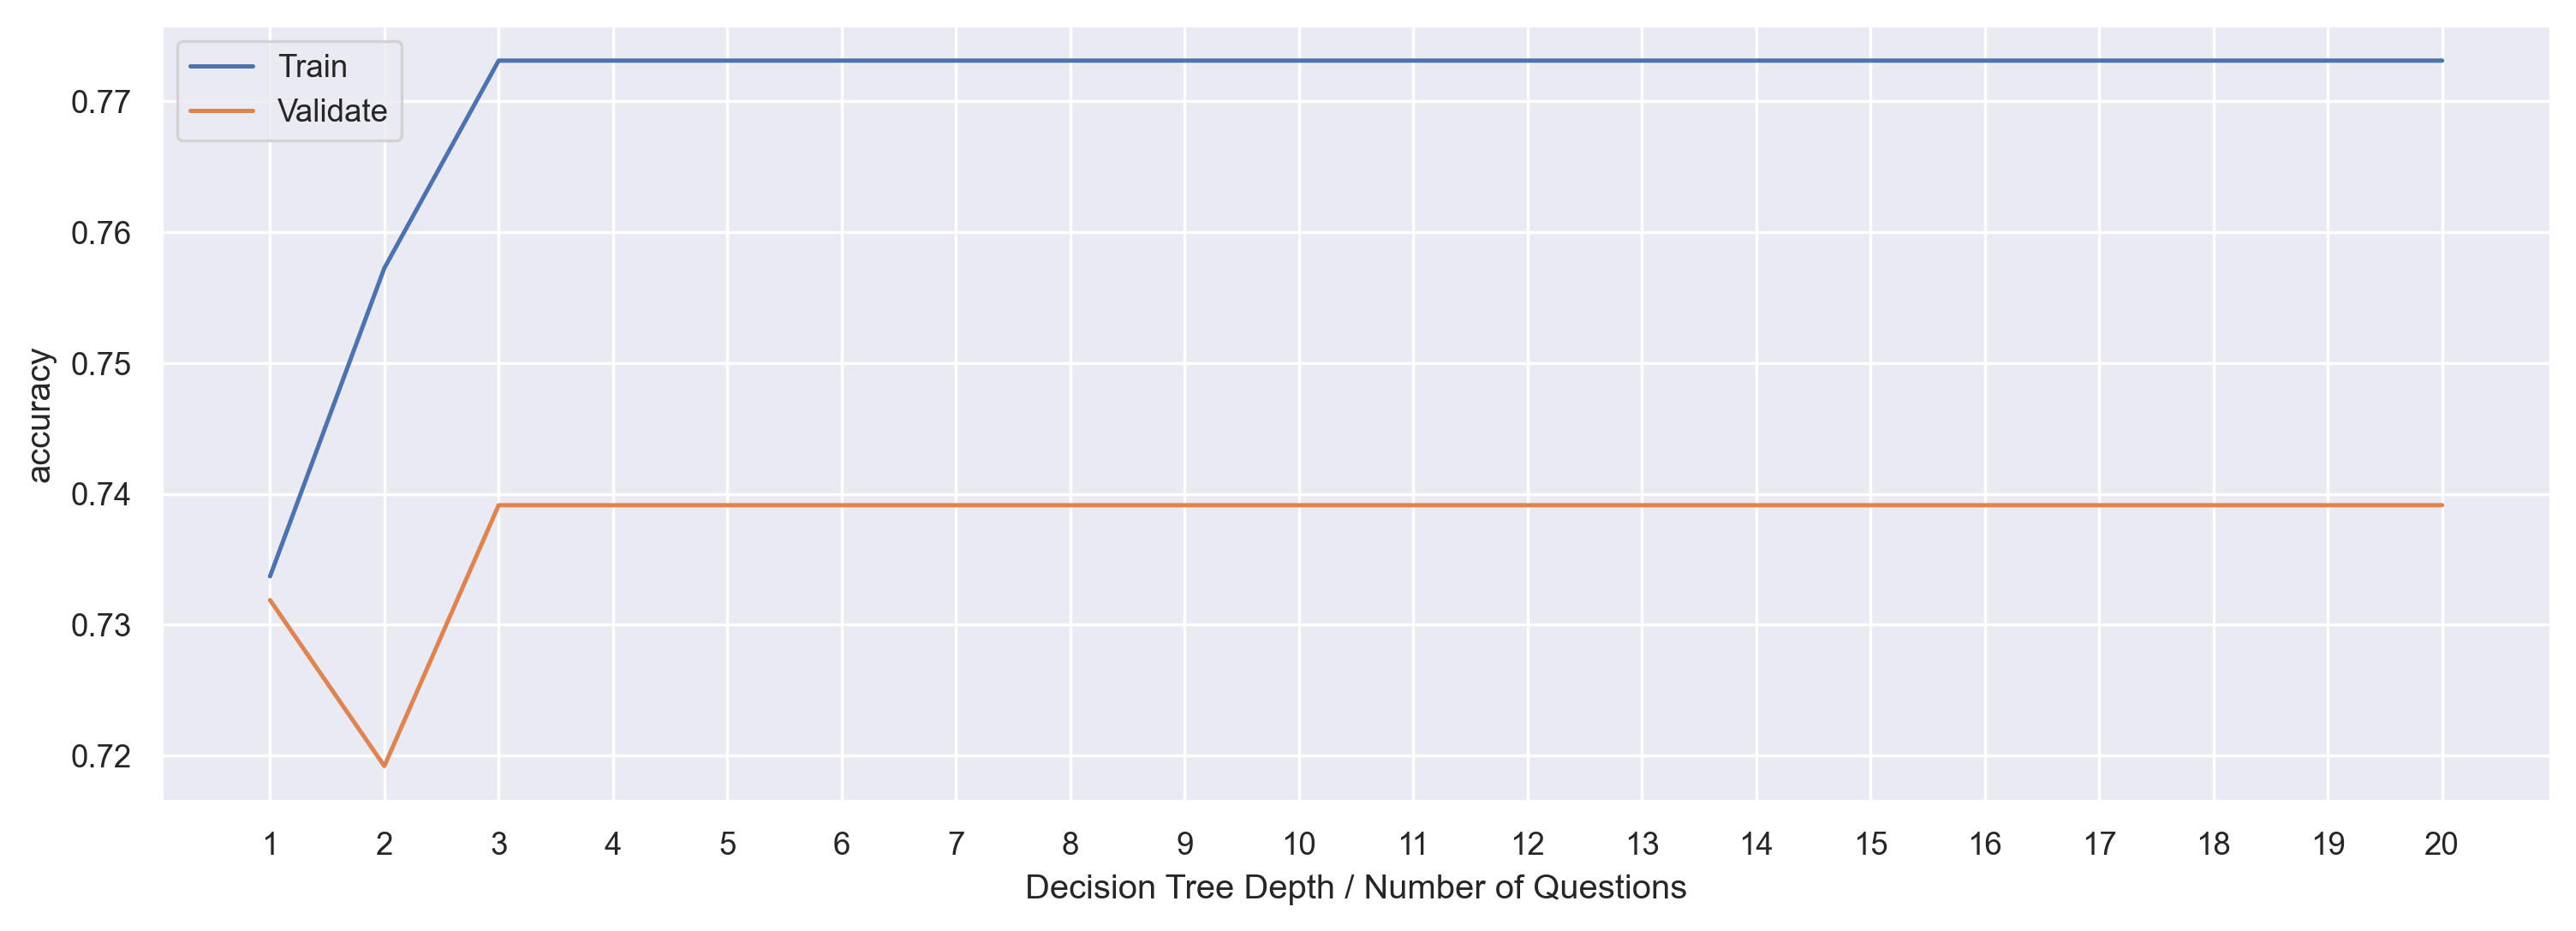

In [1319]:
# plotting the "Random Forest" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

i_range = range(1, 21)
train_scores = []
validate_scores = []

for i in i_range:
    tree = DecisionTreeClassifier(max_depth = i)
    leaf_counter += 1
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    validate_scores.append(tree.score(X_validate, y_validate))
plt.figure(figsize=(12, 4))
plt.xlabel('Decision Tree Depth / Number of Questions')
plt.ylabel('accuracy')
plt.plot(i_range, train_scores, label='Train')
plt.plot(i_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(i_range)
plt.show()

In [1320]:
metrics = []

for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth = i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(2)

,max_depth,train_accuracy,validate_accuracy,percent_change_diff
0,1,0.73,0.73,0.00
1,2,0.76,0.72,0.05
2,3,0.77,0.74,0.04
3,4,0.77,0.74,0.04
4,5,0.77,0.74,0.04
5,6,0.77,0.74,0.04
6,7,0.77,0.74,0.04
7,8,0.77,0.74,0.04
8,9,0.77,0.74,0.04
9,10,0.77,0.74,0.04


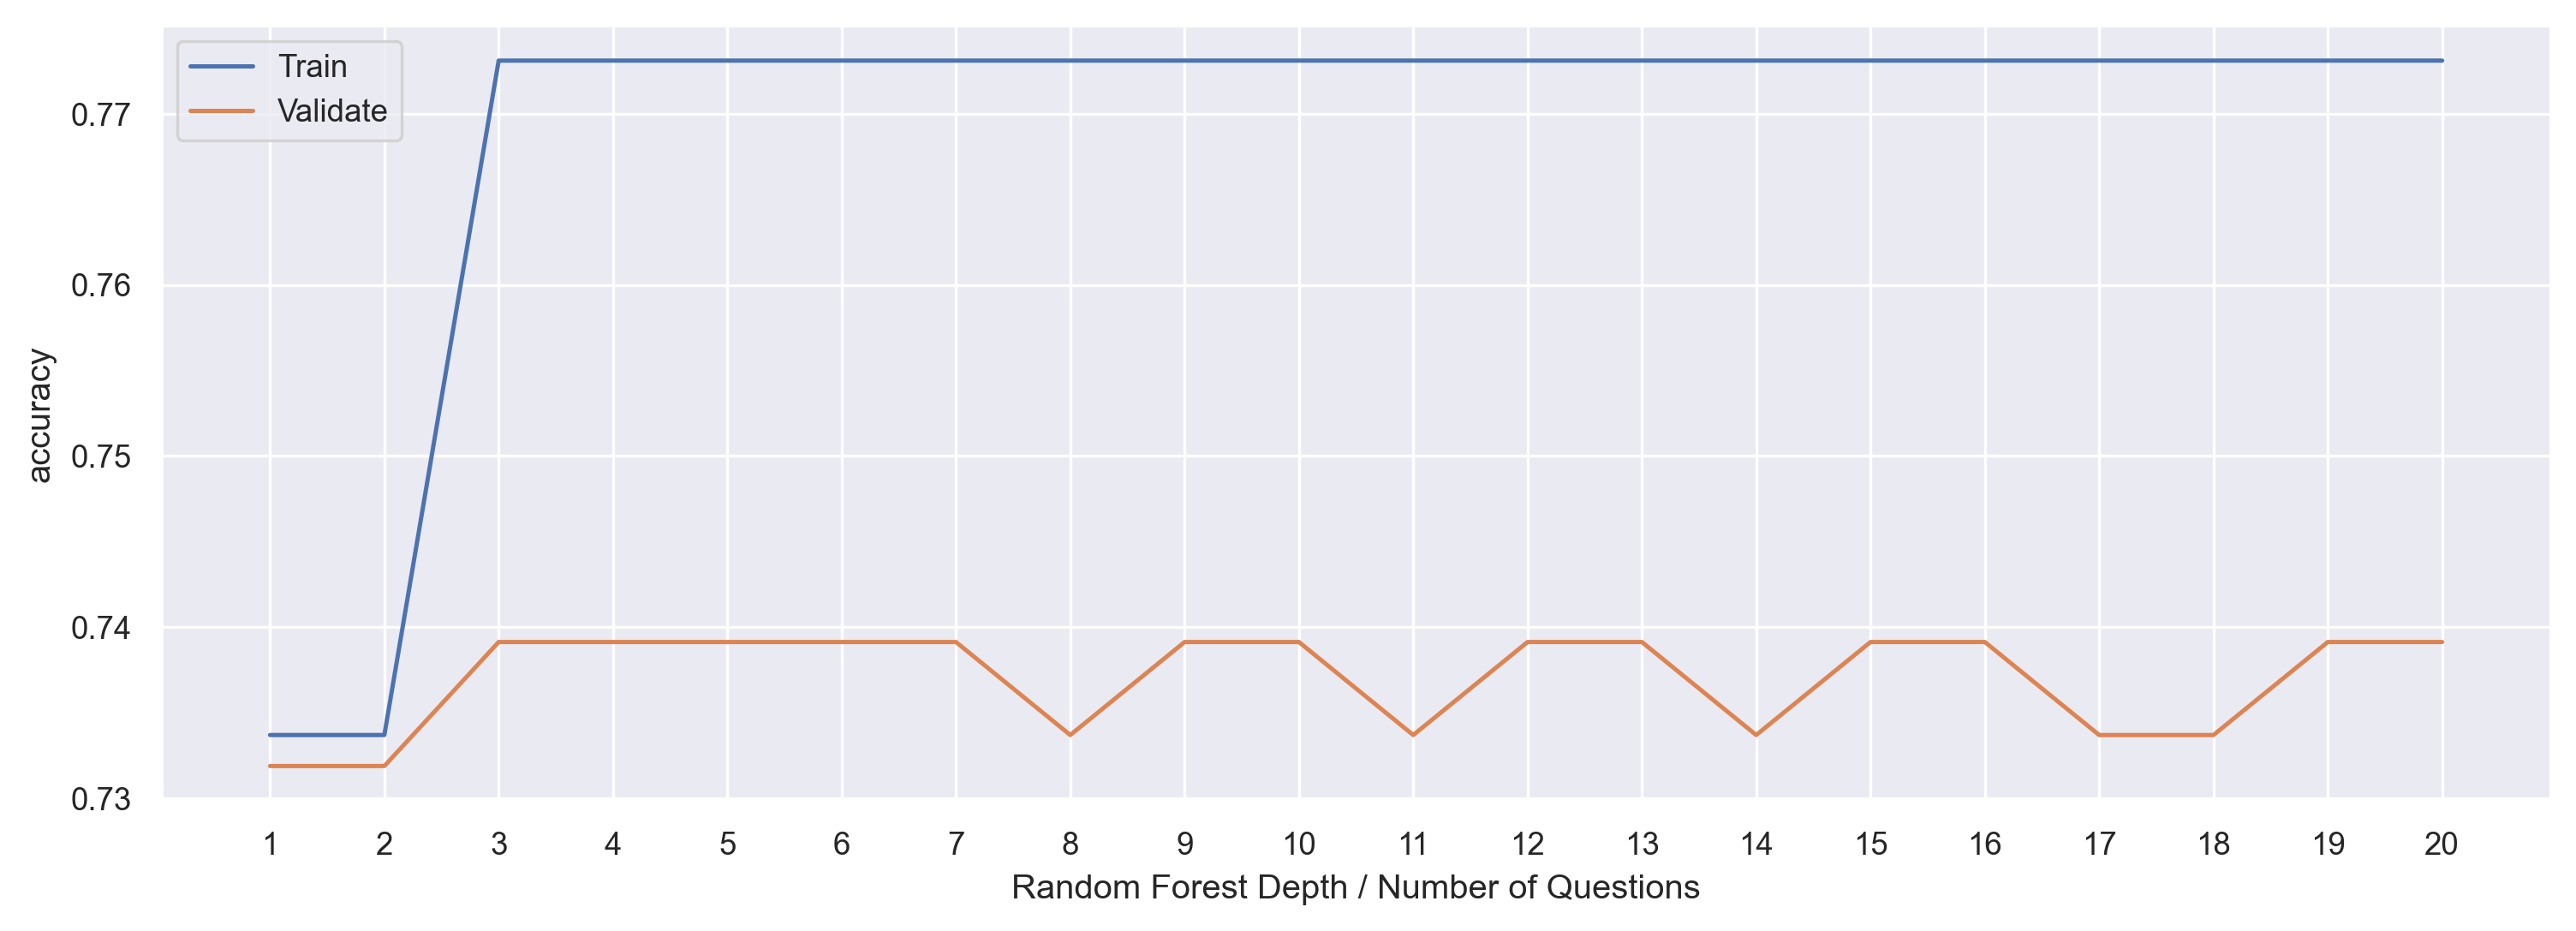

In [1321]:
# plotting the "Random Forest" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

i_range = range(1, 21)
train_scores = []
validate_scores = []
leaf_counter = 0

for i in i_range:
    rf = RandomForestClassifier(min_samples_leaf = (leaf_counter + 1), max_depth = i)
    leaf_counter += 1
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    validate_scores.append(rf.score(X_validate, y_validate))
plt.figure(figsize=(12, 4))
plt.xlabel('Random Forest Depth / Number of Questions')
plt.ylabel('accuracy')
plt.plot(i_range, train_scores, label='Train')
plt.plot(i_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(i_range)
plt.show()

In [1322]:
metrics = []
leaf_counter = 0

for i in range(1, 21):
    # Make the model
    rf = RandomForestClassifier(min_samples_leaf = (leaf_counter + 1), max_depth = i)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rf.score(X_train, y_train)
    
    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = rf.score(X_validate, y_validate)

    output = {
        "max_depth": i, \
        "num_of_sample_leaf": leaf_counter, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(2)

,max_depth,num_of_sample_leaf,train_accuracy,validate_accuracy,percent_change_diff
0,1,1,0.73,0.73,0.00
1,2,2,0.73,0.73,0.00
2,3,3,0.77,0.74,0.04
3,4,4,0.77,0.74,0.04
4,5,5,0.77,0.74,0.04
5,6,6,0.77,0.74,0.04
6,7,7,0.77,0.73,0.05
7,8,8,0.77,0.74,0.04
8,9,9,0.77,0.73,0.05
9,10,10,0.77,0.73,0.05


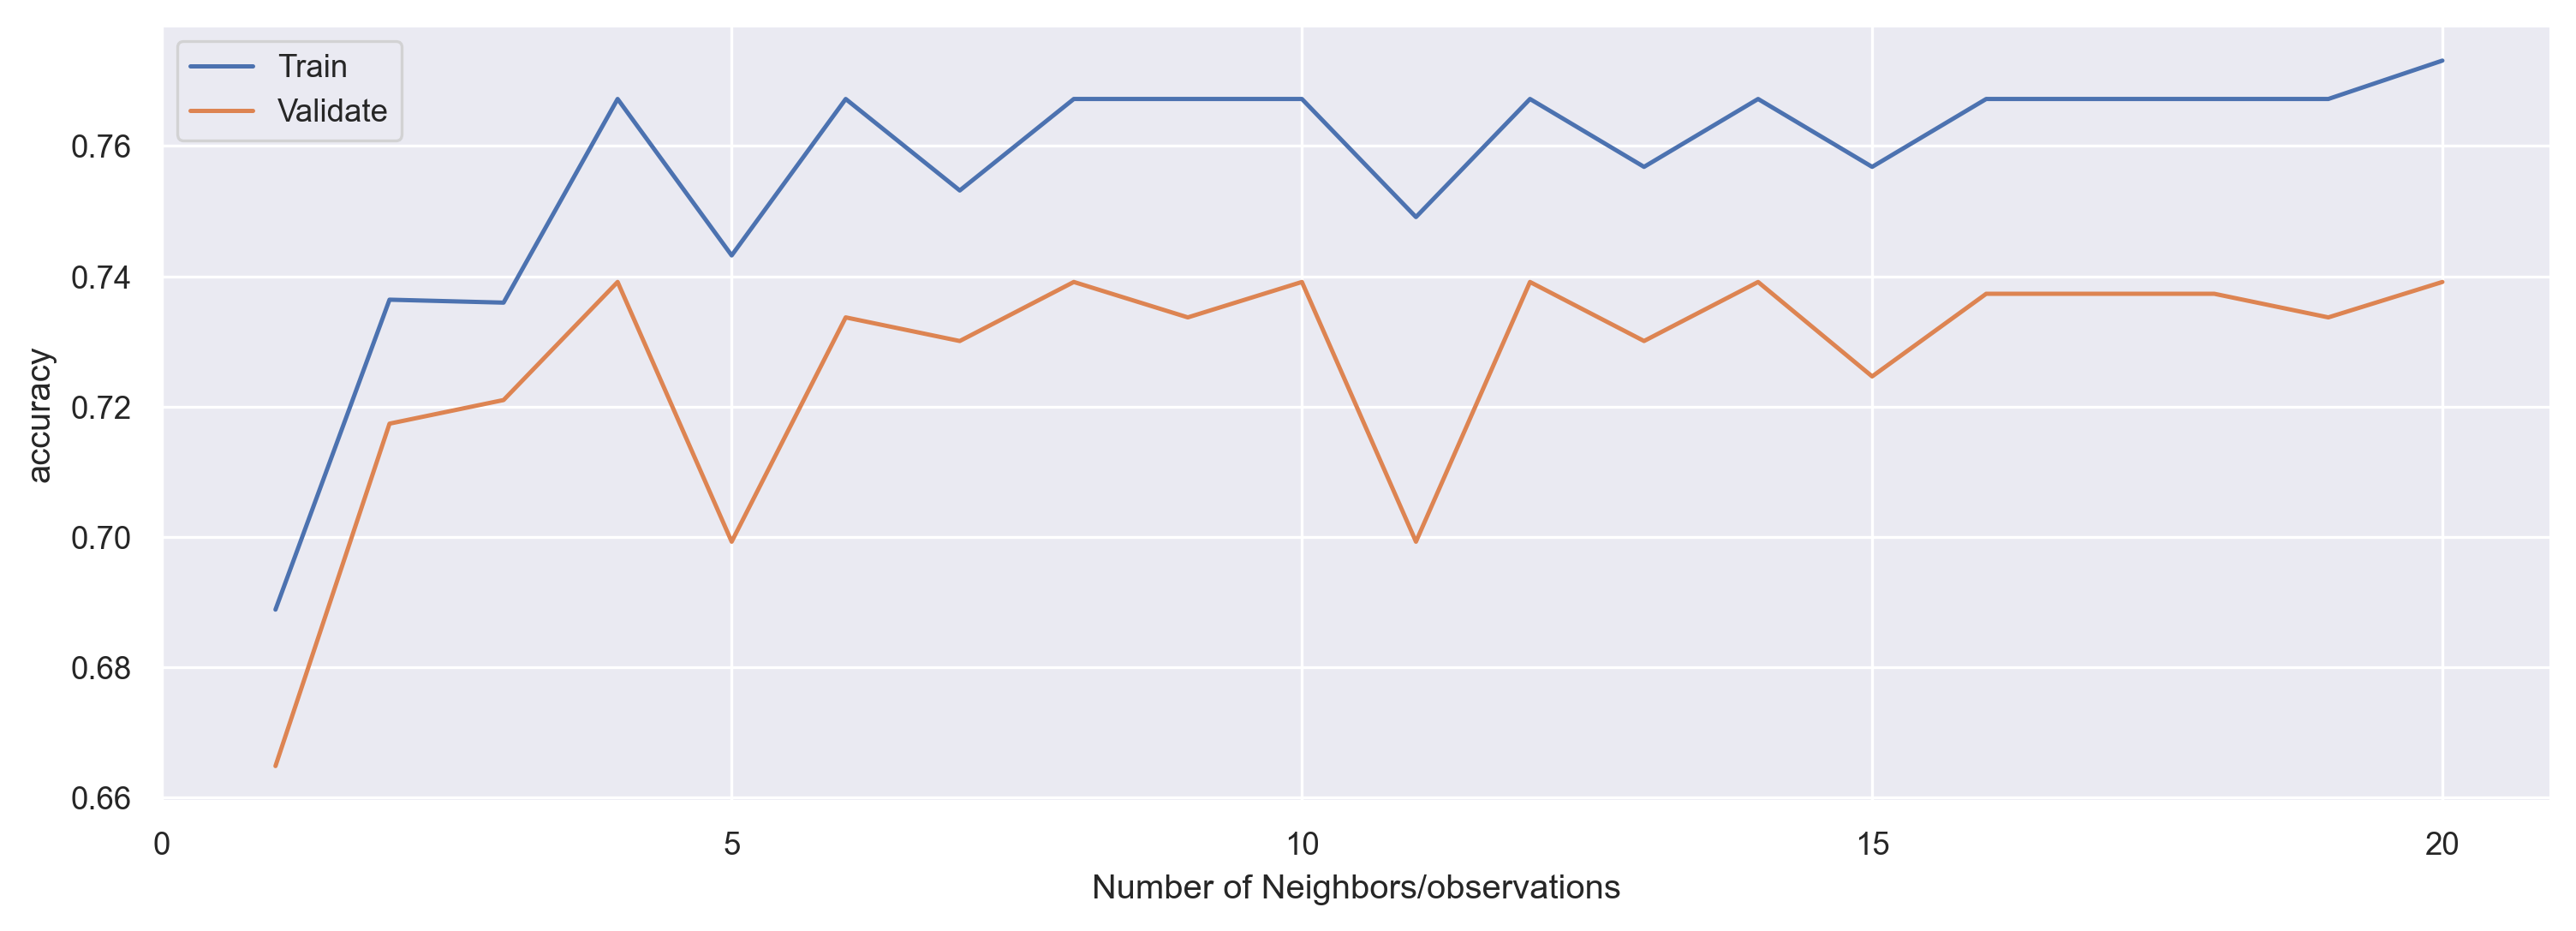

In [1323]:
# plotting the "KNN" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

n_range = range(1, 21)
train_scores = []
validate_scores = []

for n in n_range:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))

plt.figure(figsize=(12, 4))
plt.xlabel('Number of Neighbors/observations')
plt.ylabel('accuracy')
plt.plot(n_range, train_scores, label='Train')
plt.plot(n_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

In [1324]:
metrics = []

for k in range(1, 21):
    # Make the model
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')

    # Fit the model (on train and only train)
    knn = knn.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = knn.score(X_train, y_train)
    
    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = knn.score(X_validate, y_validate)

    output = {
        "num_of_neighbors": k,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(2)

,num_of_neighbors,train_accuracy,validate_accuracy,percent_change_diff
0,1,0.69,0.66,0.03
1,2,0.74,0.72,0.03
2,3,0.74,0.72,0.02
3,4,0.77,0.74,0.04
4,5,0.74,0.70,0.06
5,6,0.77,0.73,0.04
6,7,0.75,0.73,0.03
7,8,0.77,0.74,0.04
8,9,0.77,0.73,0.04
9,10,0.77,0.74,0.04


----
### Evaluating Model on Test Dataset:


In [1325]:
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 2)
rf = rf.fit(X_train, y_train)

in_sample_accuracy = rf.score(X_train, y_train)
out_of_sample_accuracy = rf.score(X_validate, y_validate)

test_accuracy = rf.score(X_test, y_test)

In [1326]:
print(f'Train Dataset Accuracy: {in_sample_accuracy}', "\n", "-----------------")
print(f"Validate Dataset Accuracy: {out_of_sample_accuracy}", "\n", "-----------------")
print(f"Test Dataset Accuracy: {test_accuracy}")

Train Dataset Accuracy: 0.7336956521739131 
 -----------------
Validate Dataset Accuracy: 0.7318840579710145 
 -----------------
Test Dataset Accuracy: 0.7379543533389687
